In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import geopandas as gpd
import plotly.graph_objs as go
from matplotlib.gridspec import GridSpec
sns.set_theme()

## Upload the datasets
Quick Dataset Overview

In [2]:
demo=pd.read_csv("C:\\Users\DannyC19\Desktop\Python\EDA project\Germany\demographics_de.csv")
covid=pd.read_csv("C:\\Users\DannyC19\Desktop\Python\EDA project\Germany\covid_de.csv",parse_dates = ['date'],index_col="date" )
vaccines=pd.read_csv("C:\\Users\DannyC19\Desktop\Python\EDA project\Germany\covid_de_vaccines.csv",parse_dates = ['date'],index_col="date")


In [3]:
#Demo
print(demo.shape)
demo.head()

(192, 4)


,state,gender,age_group,population
0,Baden-Wuerttemberg,female,00-04,261674
1,Baden-Wuerttemberg,female,05-14,490822
2,Baden-Wuerttemberg,female,15-34,1293488
3,Baden-Wuerttemberg,female,35-59,1919649
4,Baden-Wuerttemberg,female,60-79,1182736


In [4]:
#covid
print(covid.shape)
covid.sample(7)

(2790553, 7)


,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2022-02-02,Sachsen,LK Vogtlandkreis,60-79,F,13,0,13
2021-05-11,Berlin,SK Berlin Reinickendorf,60-79,F,3,0,3
2022-09-22,Bayern,LK Ansbach,60-79,F,15,0,15
2021-07-27,Thueringen,LK Schmalkalden-Meiningen,15-34,F,1,0,1
2022-02-03,Baden-Wuerttemberg,SK Baden-Baden,35-59,F,25,0,25
2022-01-25,Bayern,LK Dachau,00-04,M,17,0,17
2022-03-15,Baden-Wuerttemberg,LK Schwarzwald-Baar-Kreis,00-04,M,12,0,12


In [5]:
#vaccines
print(vaccines.shape)
vaccines.head(7)

(757, 8)


,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul
date,,,,,,,,
2020-12-27,24427,24427,0,24418,8,1,24427,0
2020-12-28,18073,18073,0,42489,9,2,42500,0
2020-12-29,50229,50229,0,92717,9,3,92729,0
2020-12-30,64213,64213,0,156929,10,3,156942,0
2020-12-31,49985,49985,0,206912,12,3,206927,0
2021-01-01,25723,25723,0,232614,27,7,232650,0
2021-01-02,47835,47835,0,280446,28,7,280485,0


In [6]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state       192 non-null    object
 1   gender      192 non-null    object
 2   age_group   192 non-null    object
 3   population  192 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.1+ KB


In [7]:
demo.nunique()

state          16
gender          2
age_group       6
population    192
dtype: int64

In [8]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2790553 entries, 2020-01-28 to 2022-12-24
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   state      object
 1   county     object
 2   age_group  object
 3   gender     object
 4   cases      int64 
 5   deaths     int64 
 6   recovered  int64 
dtypes: int64(3), object(4)
memory usage: 170.3+ MB


In [9]:
covid.nunique()

state         16
county       411
age_group      6
gender         2
cases        951
deaths        21
recovered    955
dtype: int64

In [10]:
covid.describe()

,cases,deaths,recovered
count,2.790553e+06,2.790553e+06,2.790553e+06
mean,1.333497e+01,5.761152e-02,1.305120e+01
std,3.009628e+01,3.214109e-01,3.006812e+01
min,1.000000e+00,0.000000e+00,-1.000000e+00
25%,2.000000e+00,0.000000e+00,1.000000e+00
50%,4.000000e+00,0.000000e+00,4.000000e+00
75%,1.200000e+01,0.000000e+00,1.200000e+01
max,2.156000e+03,2.100000e+01,2.156000e+03


In [11]:
covid=covid.sort_values(by = 'date')
# clean the first 2 rows since there are gaps in days.
#I won't be able to create resample of the data 
covid=covid.drop(["2020-01-02","2020-01-23"] ) 

covid

KeyError: "['2020-01-02' '2020-01-23'] not found in axis"

In [126]:
covid

,state,county,age_group,gender,cases,deaths,recovered,recovered_cum,cases_cum,deaths_cum
date,,,,,,,,,,
2020-01-28,Bayern,LK Landsberg a.Lech,15-34,M,1,0,1,1,1,0
2020-01-28,Bayern,LK Starnberg,35-59,M,1,0,1,2,2,0
2020-01-29,Bayern,LK Fuerstenfeldbruck,15-34,M,1,0,1,3,3,0
2020-01-29,Bayern,SK Muenchen,15-34,F,1,0,1,4,4,0
2020-01-31,Bayern,LK Traunstein,00-04,F,1,0,1,5,5,0
...,...,...,...,...,...,...,...,...,...,...
2023-02-02,Bayern,LK Starnberg,00-04,M,1,0,0,37423476,37803262,166014
2023-02-02,Hamburg,SK Hamburg,35-59,F,29,0,0,37423476,37803291,166014
2023-02-02,Nordrhein-Westfalen,LK Dueren,15-34,F,16,0,0,37423476,37803307,166014


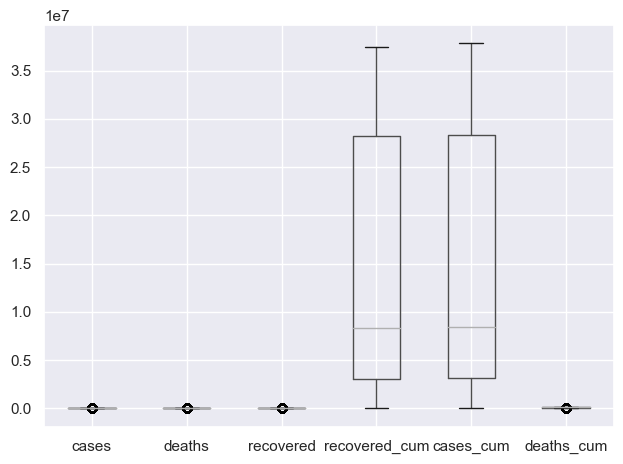

In [120]:
#Using boxplots to identify outliers within numeric data
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = covid.boxplot()
fig.tight_layout()

In [12]:
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 2020-12-27 to 2023-01-22
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   doses                757 non-null    int64
 1   doses_first          757 non-null    int64
 2   doses_second         757 non-null    int64
 3   pfizer_cumul         757 non-null    int64
 4   moderna_cumul        757 non-null    int64
 5   astrazeneca_cumul    757 non-null    int64
 6   persons_first_cumul  757 non-null    int64
 7   persons_full_cumul   757 non-null    int64
dtypes: int64(8)
memory usage: 53.2 KB


In [13]:
vaccines.nunique()

doses                  755
doses_first            729
doses_second           719
pfizer_cumul           757
moderna_cumul          752
astrazeneca_cumul      573
persons_first_cumul    757
persons_full_cumul     739
dtype: int64

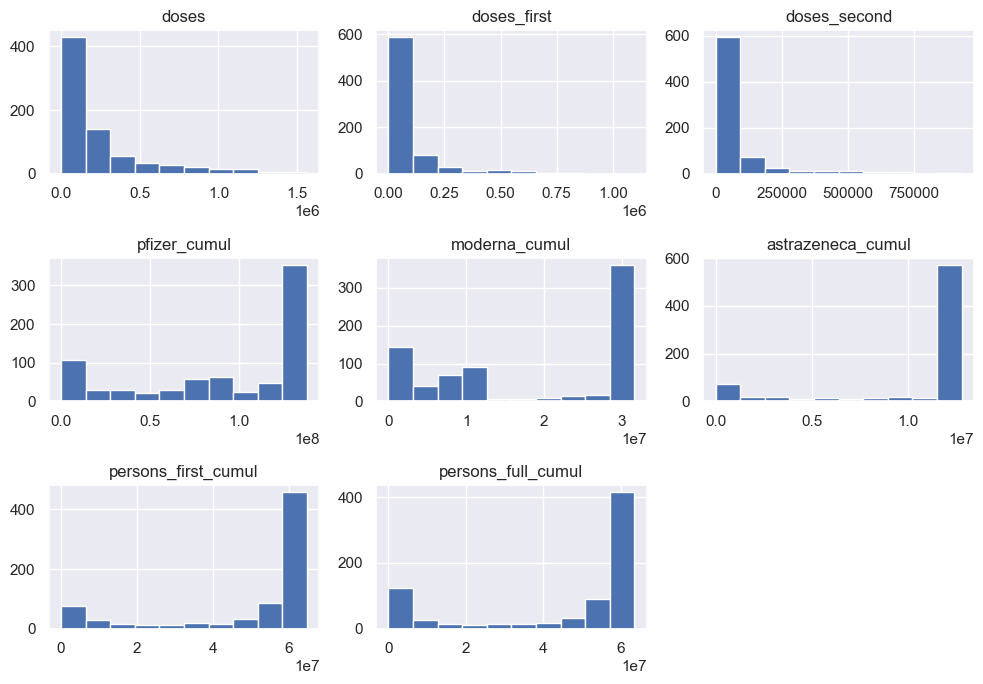

In [14]:
vaccines.hist(figsize=(10,7))
plt.tight_layout()
plt.show()

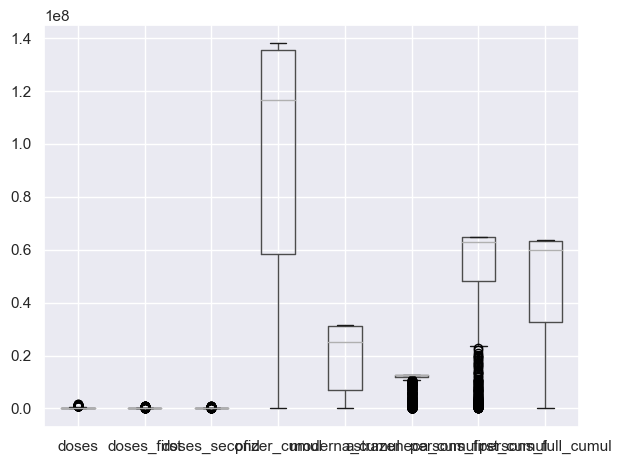

In [135]:
#Using boxplots to identify outliers within numeric data
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = vaccines.boxplot()
fig.tight_layout()
# astrazeneca_cumul & persons_first_cumul have outliers

## Identify Missing Data

In [15]:
print(demo.isnull().sum())
print(covid.isnull().sum())
print(vaccines.isnull().sum())

state         0
gender        0
age_group     0
population    0
dtype: int64
state             0
county            0
age_group     14023
gender       125291
cases             0
deaths            0
recovered         0
dtype: int64
doses                  0
doses_first            0
doses_second           0
pfizer_cumul           0
moderna_cumul          0
astrazeneca_cumul      0
persons_first_cumul    0
persons_full_cumul     0
dtype: int64


In [7]:
#rows that miss both age_group and gender
covid[covid.age_group.isnull() &covid.gender.isnull()]

,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2022-02-18,Baden-Wuerttemberg,LK Alb-Donau-Kreis,NaN,NaN,1,0,1
2022-01-19,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
2022-01-20,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
2022-01-25,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
2022-01-31,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...
2021-03-24,Thueringen,LK Sonneberg,NaN,NaN,2,0,2
2021-11-24,Thueringen,LK Unstrut-Hainich-Kreis,NaN,NaN,1,0,1
2022-12-20,Thueringen,SK Jena,NaN,NaN,1,0,1


In [16]:
#Percentage of missing age data out of all

print(f'In age_group {len(covid[covid.age_group.isnull()])*100/len(covid)}% of values are missing')

In age_group 0.5025168846461615% of values are missing


In [17]:
#Create df witout the missing age data
covid_age=covid.dropna(subset=['age_group'])
covid_age

,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2020-01-28,Bayern,LK Landsberg a.Lech,15-34,M,1,0,1
2020-01-28,Bayern,LK Starnberg,35-59,M,1,0,1
2020-01-29,Bayern,SK Muenchen,15-34,F,1,0,1
2020-01-29,Bayern,LK Fuerstenfeldbruck,15-34,M,1,0,1
2020-01-31,Bayern,LK Fuerstenfeldbruck,35-59,M,1,0,1
...,...,...,...,...,...,...,...
2022-12-24,Baden-Wuerttemberg,SK Mannheim,35-59,M,1,0,0
2022-12-24,Baden-Wuerttemberg,SK Mannheim,35-59,F,4,0,0
2022-12-24,Baden-Wuerttemberg,SK Mannheim,60-79,F,3,0,0


In [18]:
#Percentage of missing gender data out of all
print(f'In gender {len(covid[covid.gender.isnull()])*100/len(covid)}% of values are missing')

In gender 4.489826926777596% of values are missing


In [19]:
#Create df witout the missing gender data
covid_gender=covid.dropna(subset=['gender'])
covid_gender

,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2020-01-28,Bayern,LK Landsberg a.Lech,15-34,M,1,0,1
2020-01-28,Bayern,LK Starnberg,35-59,M,1,0,1
2020-01-29,Bayern,SK Muenchen,15-34,F,1,0,1
2020-01-29,Bayern,LK Fuerstenfeldbruck,15-34,M,1,0,1
2020-01-31,Bayern,LK Fuerstenfeldbruck,35-59,M,1,0,1
...,...,...,...,...,...,...,...
2022-12-24,Baden-Wuerttemberg,SK Mannheim,35-59,M,1,0,0
2022-12-24,Baden-Wuerttemberg,SK Mannheim,35-59,F,4,0,0
2022-12-24,Baden-Wuerttemberg,SK Mannheim,60-79,F,3,0,0


# Data analysis

### Demographic parameters

In [20]:
demo

,state,gender,age_group,population
0,Baden-Wuerttemberg,female,00-04,261674
1,Baden-Wuerttemberg,female,05-14,490822
2,Baden-Wuerttemberg,female,15-34,1293488
3,Baden-Wuerttemberg,female,35-59,1919649
4,Baden-Wuerttemberg,female,60-79,1182736
...,...,...,...,...
187,Thueringen,male,05-14,92545
188,Thueringen,male,15-34,214553
189,Thueringen,male,35-59,384822
190,Thueringen,male,60-79,264189


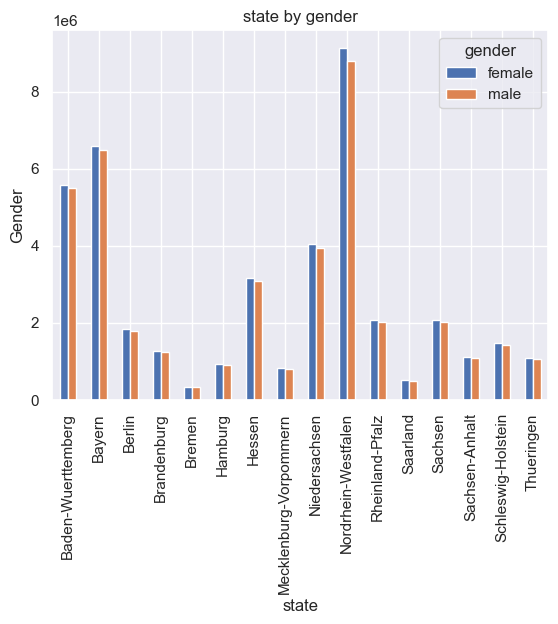

In [21]:
#number of male/ female by state
demo.pivot_table(index='state', columns='gender',values='population', aggfunc='sum').plot.bar(ylabel='Gender',
                                                                                              title="state by gender")
plt.show()
#There is no significant difference

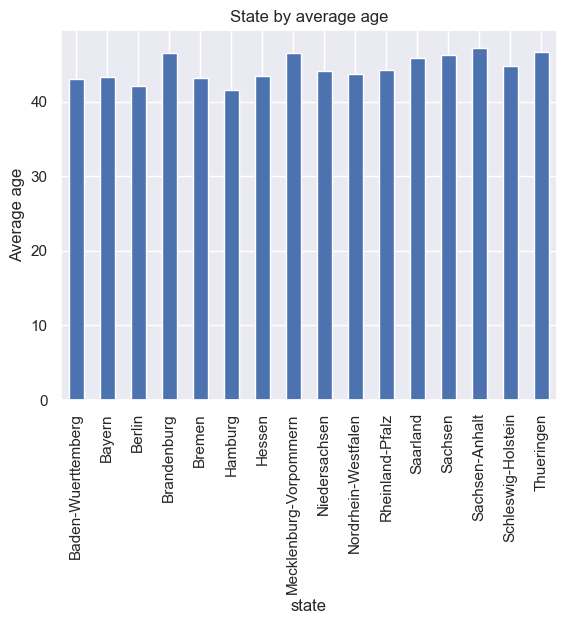

In [22]:

#avg age by state
demo_age=demo[['state','age_group','population']]
demo_age=demo_age.replace({'00-04':2, '05-14':9.5, '15-34':24.5, '35-59':47, '60-79':69.5, '80-99':89.5})

demo_age['a_pop']=demo_age['age_group']*demo_age['population']
total=demo.groupby('state')['population'].sum()


ave=demo_age.groupby('state')['a_pop'].sum()/total
ave.plot.bar(ylabel="Average age", title="State by average age")
plt.show()
# no significant difference

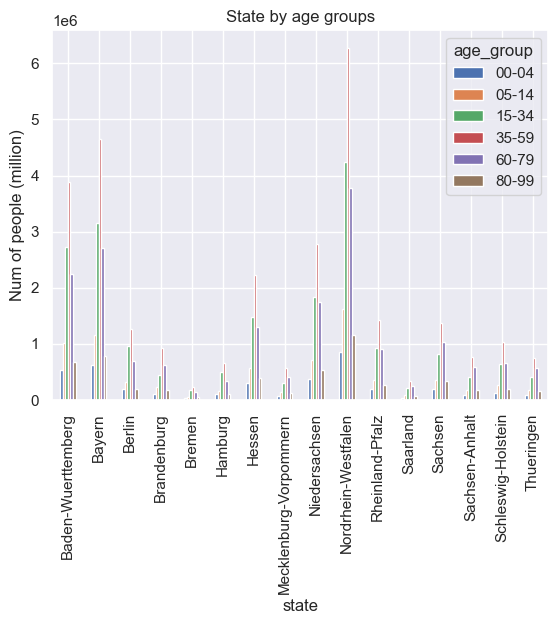

In [23]:
#Age representation per state
#demo.pivot_table(index="state", columns="age_group", values="population",aggfunc="sum").plot.bar()
demo.pivot_table(index="state", columns="age_group", values="population",aggfunc="sum").plot.bar(
    ylabel="Num of people (million)", title="State by age groups")
plt.show()

#### Show states by population

                        population
state                             
Nordrhein-Westfalen       17932651
Bayern                    13076721
Baden-Wuerttemberg        11069533
Niedersachsen              7982448
Hessen                     6265809
Rheinland-Pfalz            4084844
Sachsen                    4077937
Berlin                     3644826
Schleswig-Holstein         2896712
Brandenburg                2511917
Sachsen-Anhalt             2208321
Thueringen                 2143145
Hamburg                    1841179
Mecklenburg-Vorpommern     1609675
Saarland                    990509
Bremen                      682986


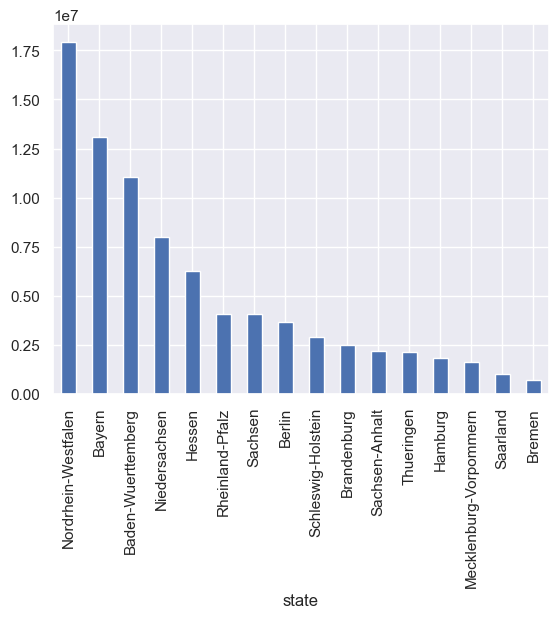

In [26]:
#states by population

#print(demo.groupby('state')['population'].sum().sort_values(ascending=False))
population=demo.groupby('state')['population'].sum()
population=population.reset_index().rename(columns={0: 'population'})
population = population.sort_values('state')
population.set_index('state',inplace=True)

print(population.sort_values('population', ascending=False))
demo.groupby('state')['population'].sum().sort_values(ascending=False).plot.bar()
plt.show()

### Create population pyramid

In [29]:
#create df with age groups of 5 years age distribution
data = {'age': ['0-4', '5-9', '10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','100+'],
        'male': [2017003,2028375,1931568,1980883,2351124,2539374,2840861,2735235,2614098,2420702,3035468,3432851,3007041,2398553,1965012,1429949,1435199,691300,233311,4454,3842],
        'female': [1913080,1922600,1824282,1844388,2125891,2318275,2659524,2627224,2579942,2407460,3010734,3420917,3095065,2618782,2267543,1761955,1996286,1156060,513587,150296,19643]}

demo2 = pd.DataFrame(data)
print(demo2)



      age     male   female
0     0-4  2017003  1913080
1     5-9  2028375  1922600
2   10-14  1931568  1824282
3   15-19  1980883  1844388
4   20-24  2351124  2125891
5   25-29  2539374  2318275
6   30-34  2840861  2659524
7   35-39  2735235  2627224
8   40-44  2614098  2579942
9   45-49  2420702  2407460
10  50-54  3035468  3010734
11  55-59  3432851  3420917
12  60-64  3007041  3095065
13  65-69  2398553  2618782
14  70-74  1965012  2267543
15  75-79  1429949  1761955
16  80-84  1435199  1996286
17  85-89   691300  1156060
18  90-94   233311   513587
19  95-99     4454   150296
20   100+     3842    19643


In [31]:
#What is the ratio of pre, post and reproductive fractions in populations?
pre_reproductive=['0-4', '5-9', '10-14']
reproductive=['15-19','20-24','25-29','30-34','35-39','40-44']
post_reproductive=['45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','100+']

#ratio of pre reproductive population
pre=demo2[demo2['age'].isin(pre_reproductive)]
pre_fm=pre['female'].sum()+pre['male'].sum()
total_population=demo['population'].sum()
print(f'ratio of pre reproductive population is {(pre_fm/total_population) *100:.2f}%')


#ratio of  reproductive population
rep=demo2[demo2['age'].isin(reproductive)]
rep_fm=rep['female'].sum()+rep['male'].sum()
print(f'ratio of  reproductive population is {(rep_fm/total_population) *100:.2f}%')


#ratio of post reproductive population
post=demo2[demo2['age'].isin(post_reproductive)]
post_fm=post['female'].sum()+post['male'].sum()
print(f'ratio of  reproductive population is {(post_fm/total_population) *100:.2f}%')

#print(post_fm, rep_fm,pre_fm)
#Where is a prevalence of old population 

ratio of pre reproductive population is 14.02%
ratio of  reproductive population is 35.19%
ratio of  reproductive population is 51.16%


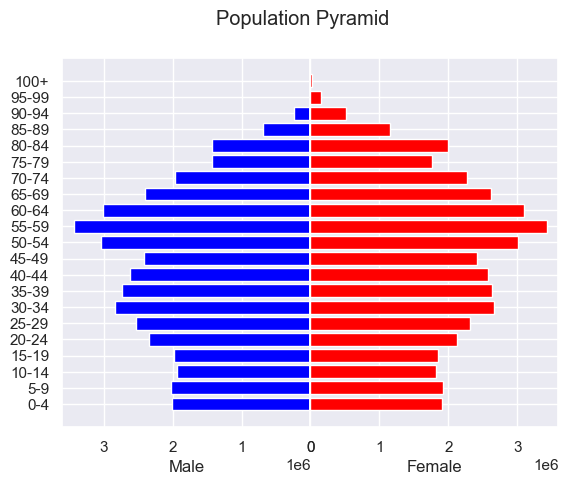

In [61]:
# create a figure with two subplots
fig, ax = plt.subplots(ncols=2, sharey=True)

# plot the male population as a horizontal bar chart on the left subplot
ax[0].barh(demo2['age'], demo2['male'], align='center', color='blue')
ax[0].invert_xaxis()
ax[0].set_xlabel('Male')

# plot the female population as a horizontal bar chart on the right subplot
ax[1].barh(demo2['age'], demo2['female'], align='center', color='red')
ax[1].set_xlabel('Female')

# add a title to the figure
fig.suptitle('Population Pyramid')

# adjust the spacing between the subplots
fig.subplots_adjust(wspace=0)

# show the plot
plt.show()

#Germany presents prevalence of old population that will decline with time.
#Will expect ot see more deaths from corona since there are more than 50% old population

#### Present on map each county by population

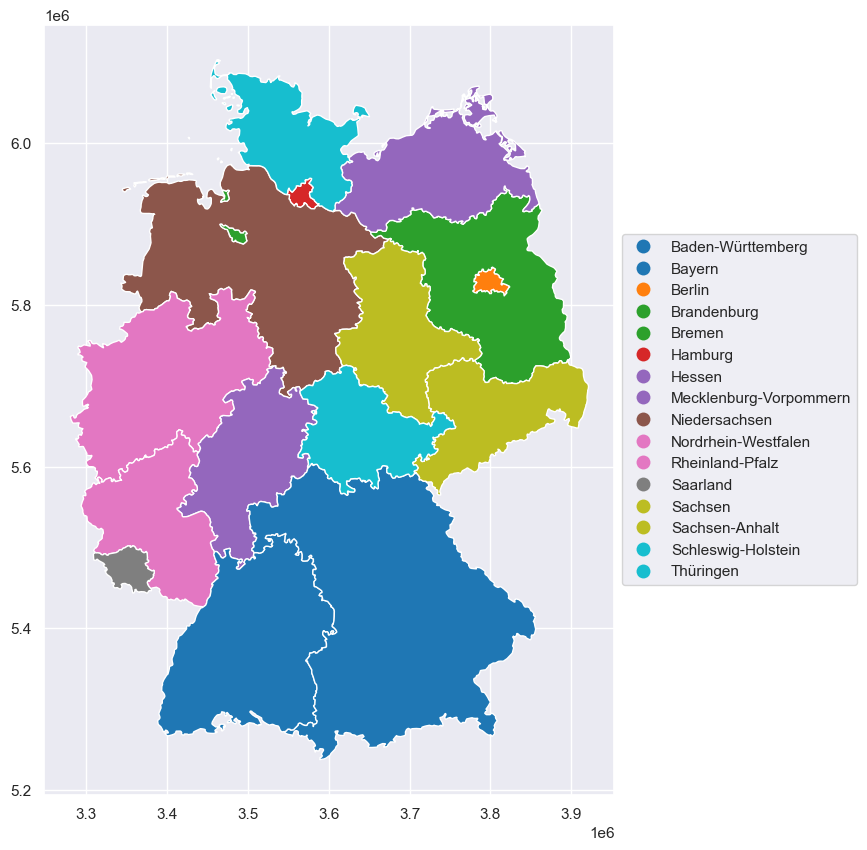

In [12]:
# Map presentation with geoPandas
gdf = gpd.read_file("C:\\Users\ALIN\Desktop\Python_Alin\EDA project\pandas_project\de_state.shp")
gdf.plot(categorical = True, column = 'GEN', legend = True,figsize = (10,10),edgecolor = 'white', legend_kwds = {'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
plt.show()

In [23]:
#gdf.set_index('GEN')
gdf


,ADE,RS,RS_0,geometry
GEN,,,,
Hamburg,2,02,020000000000,"MULTIPOLYGON (((3578695.661 5955304.456, 35781..."
Niedersachsen,2,03,030000000000,"MULTIPOLYGON (((3354775.046 5942939.764, 33546..."
Bremen,2,04,040000000000,"MULTIPOLYGON (((3468658.496 5898364.974, 34702..."
Nordrhein-Westfalen,2,05,050000000000,"POLYGON ((3477450.781 5820982.368, 3479895.578..."
Hessen,2,06,060000000000,"POLYGON ((3535084.230 5721608.644, 3535279.888..."
Rheinland-Pfalz,2,07,070000000000,"POLYGON ((3418896.770 5638774.098, 3419770.012..."
Baden-Württemberg,2,08,080000000000,"MULTIPOLYGON (((3475285.294 5283087.348, 34749..."
Bayern,2,09,090000000000,"POLYGON ((3609551.484 5269631.549, 3610838.499..."
Saarland,2,10,100000000000,"POLYGON ((3360522.937 5500321.672, 3361336.128..."


In [24]:
#match state names in gdf and population df
gdf.rename(index={'Baden-Württemberg': 'Baden-Wuerttemberg'}, inplace=True)
gdf.rename(index={'Thüringen': 'Thueringen'}, inplace=True)
gdf

#sort valus by state
# gdf=gdf.sort_values(by=['GEN'] )
# gdf.set_index('GEN', inplace = True)



,ADE,RS,RS_0,geometry
GEN,,,,
Hamburg,2,02,020000000000,"MULTIPOLYGON (((3578695.661 5955304.456, 35781..."
Niedersachsen,2,03,030000000000,"MULTIPOLYGON (((3354775.046 5942939.764, 33546..."
Bremen,2,04,040000000000,"MULTIPOLYGON (((3468658.496 5898364.974, 34702..."
Nordrhein-Westfalen,2,05,050000000000,"POLYGON ((3477450.781 5820982.368, 3479895.578..."
Hessen,2,06,060000000000,"POLYGON ((3535084.230 5721608.644, 3535279.888..."
Rheinland-Pfalz,2,07,070000000000,"POLYGON ((3418896.770 5638774.098, 3419770.012..."
Baden-Wuerttemberg,2,08,080000000000,"MULTIPOLYGON (((3475285.294 5283087.348, 34749..."
Bayern,2,09,090000000000,"POLYGON ((3609551.484 5269631.549, 3610838.499..."
Saarland,2,10,100000000000,"POLYGON ((3360522.937 5500321.672, 3361336.128..."


In [25]:
population

,population
state,
Baden-Wuerttemberg,11069533
Bayern,13076721
Berlin,3644826
Brandenburg,2511917
Bremen,682986
Hamburg,1841179
Hessen,6265809
Mecklenburg-Vorpommern,1609675
Niedersachsen,7982448


In [26]:
PopulationByState = gdf.join(population)
PopulationByState.reset_index(inplace = True)
PopulationByState


,GEN,ADE,RS,RS_0,geometry,population
0,Hamburg,2,02,020000000000,"MULTIPOLYGON (((3578695.661 5955304.456, 35781...",1841179
1,Niedersachsen,2,03,030000000000,"MULTIPOLYGON (((3354775.046 5942939.764, 33546...",7982448
2,Bremen,2,04,040000000000,"MULTIPOLYGON (((3468658.496 5898364.974, 34702...",682986
3,Nordrhein-Westfalen,2,05,050000000000,"POLYGON ((3477450.781 5820982.368, 3479895.578...",17932651
4,Hessen,2,06,060000000000,"POLYGON ((3535084.230 5721608.644, 3535279.888...",6265809
5,Rheinland-Pfalz,2,07,070000000000,"POLYGON ((3418896.770 5638774.098, 3419770.012...",4084844
6,Baden-Wuerttemberg,2,08,080000000000,"MULTIPOLYGON (((3475285.294 5283087.348, 34749...",11069533
7,Bayern,2,09,090000000000,"POLYGON ((3609551.484 5269631.549, 3610838.499...",13076721
8,Saarland,2,10,100000000000,"POLYGON ((3360522.937 5500321.672, 3361336.128...",990509
9,Berlin,2,11,110000000000,"POLYGON ((3812872.568 5833365.938, 3813771.098...",3644826


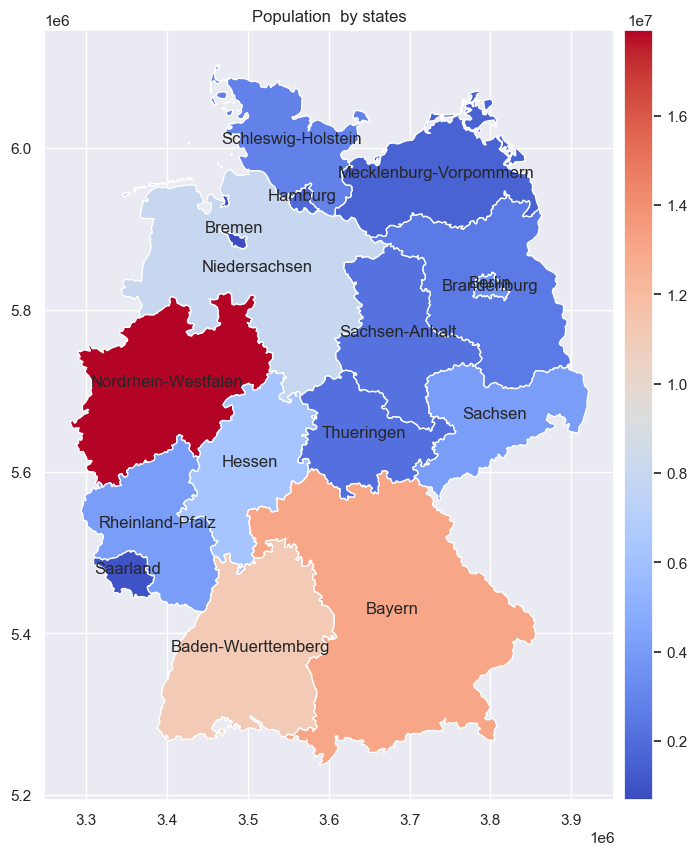

In [35]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Population  by states")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
PopulationByState.plot( column='population', ax=ax, cmap='coolwarm', legend=True, cax = cax, vmin=682986, vmax=17932651)
PopulationByState.apply(lambda x: ax.annotate(text=x['GEN'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)


plt.show()



#### Is there a correlation between population  and number of cases/deaths?

In [28]:
population1=demo.groupby('state')['population'].sum()
population1=population1.reset_index().rename(columns={0: 'population'})
population1

,state,population
0,Baden-Wuerttemberg,11069533
1,Bayern,13076721
2,Berlin,3644826
3,Brandenburg,2511917
4,Bremen,682986
5,Hamburg,1841179
6,Hessen,6265809
7,Mecklenburg-Vorpommern,1609675
8,Niedersachsen,7982448
9,Nordrhein-Westfalen,17932651


In [29]:
#Join population with cases, deaths, recovery by state
CovidByState=covid.groupby('state').sum()
CovidByState=pd.merge(CovidByState,population1,on="state")
CovidByState=CovidByState.set_index('state')
CovidByState=CovidByState.sort_values("population",ascending=False)
CovidByState

,cases,deaths,recovered,population
state,,,,
Nordrhein-Westfalen,7918225,30862,7830806,17932651
Bayern,6668169,28116,6607699,13076721
Baden-Wuerttemberg,5009778,18985,4965489,11069533
Niedersachsen,3820165,13190,3777849,7982448
Hessen,2887077,12179,2853678,6265809
Rheinland-Pfalz,1742703,6833,1723709,4084844
Sachsen,1944901,16744,1920590,4077937
Berlin,1418585,5446,1405612,3644826
Schleswig-Holstein,1167600,3443,1158395,2896712


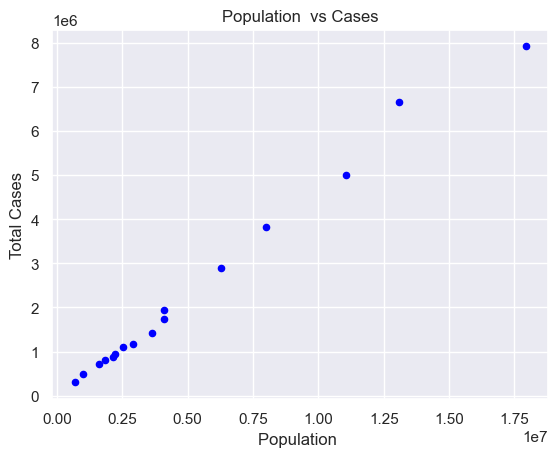

In [30]:
#create scatter plot  with population density and cases number to see possible correlation
CovidByState.plot.scatter(x='population',y='cases',color='blue')
plt.title('Population  vs Cases')
plt.xlabel('Population ')
plt.ylabel('Total Cases')
plt.show()
#There is a linear correlation between population and cases

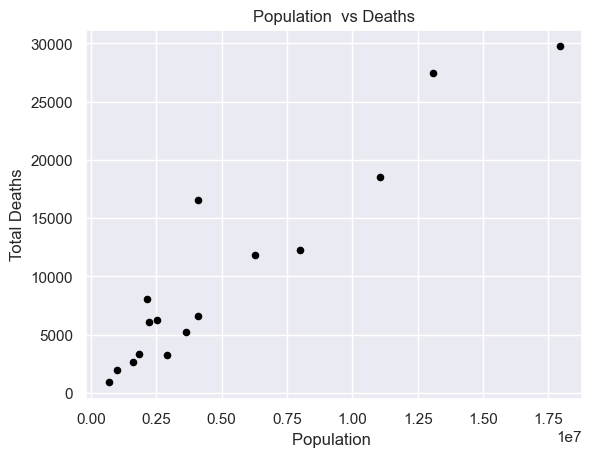

In [91]:
#create scatter plot  with population density and death number to see possible correlation
CovidByState.plot.scatter(x='population',y='deaths',color='black')
plt.title('Population  vs Deaths')
plt.xlabel('Population ')
plt.ylabel('Total Deaths')
plt.show()
#There is a linear correlation between population and deaths

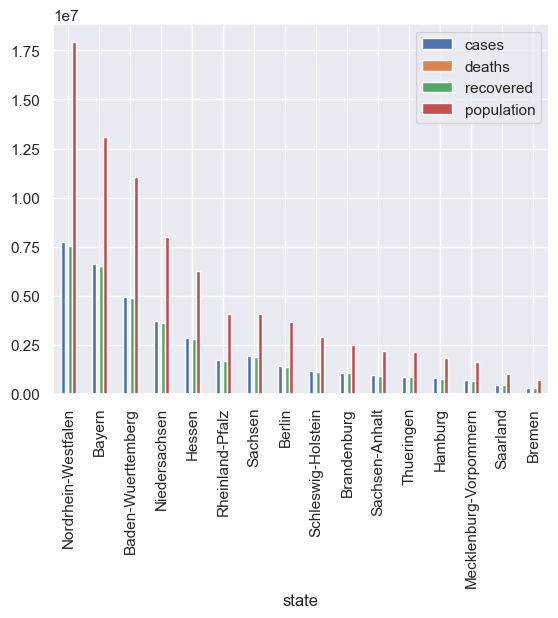

In [144]:
CovidByState.plot.bar()
plt.show()

#### show cases, deaths and population on the geopandas map

In [34]:

CovidByState2 = gdf.join(CovidByState)
CovidByState2.reset_index(inplace = True)
CovidByState2


,GEN,ADE,RS,RS_0,geometry,cases,deaths,recovered,population
0,Hamburg,2,02,020000000000,"MULTIPOLYGON (((3578695.661 5955304.456, 35781...",802806,3544,796205,1841179
1,Niedersachsen,2,03,030000000000,"MULTIPOLYGON (((3354775.046 5942939.764, 33546...",3820165,13190,3777849,7982448
2,Bremen,2,04,040000000000,"MULTIPOLYGON (((3468658.496 5898364.974, 34702...",301050,956,298768,682986
3,Nordrhein-Westfalen,2,05,050000000000,"POLYGON ((3477450.781 5820982.368, 3479895.578...",7918225,30862,7830806,17932651
4,Hessen,2,06,060000000000,"POLYGON ((3535084.230 5721608.644, 3535279.888...",2887077,12179,2853678,6265809
5,Rheinland-Pfalz,2,07,070000000000,"POLYGON ((3418896.770 5638774.098, 3419770.012...",1742703,6833,1723709,4084844
6,Baden-Wuerttemberg,2,08,080000000000,"MULTIPOLYGON (((3475285.294 5283087.348, 34749...",5009778,18985,4965489,11069533
7,Bayern,2,09,090000000000,"POLYGON ((3609551.484 5269631.549, 3610838.499...",6668169,28116,6607699,13076721
8,Saarland,2,10,100000000000,"POLYGON ((3360522.937 5500321.672, 3361336.128...",484735,2087,480656,990509
9,Berlin,2,11,110000000000,"POLYGON ((3812872.568 5833365.938, 3813771.098...",1418585,5446,1405612,3644826


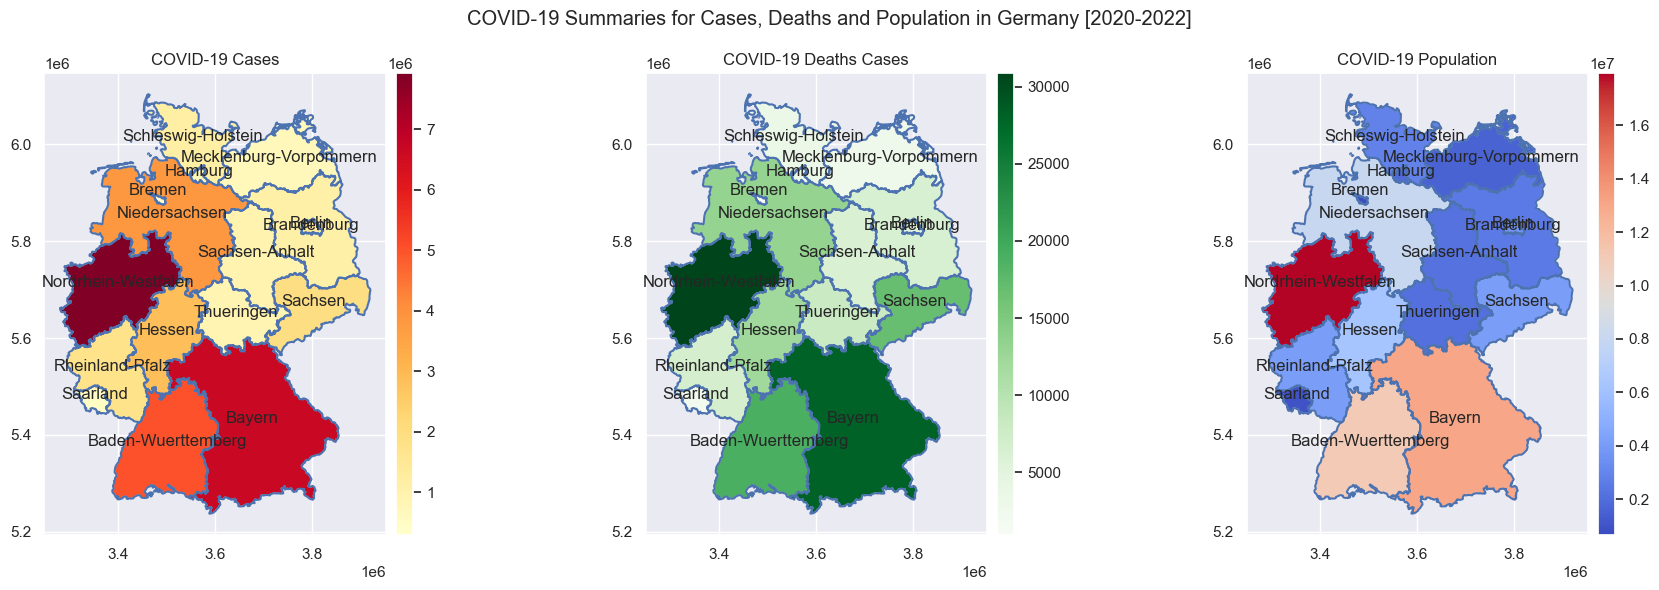

In [38]:


fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (18,6))
fig.suptitle ("COVID-19 Summaries for Cases, Deaths and Population in Germany [2020-2022]")

CovidByState2["geometry"].boundary.plot(ax=ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)
CovidByState2.plot( column='cases', ax=ax1, cmap='YlOrRd', legend=True, cax = cax)
CovidByState2.apply(lambda x: ax1.annotate(text=x['GEN'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ax1.set_title("COVID-19 Cases")

CovidByState2["geometry"].boundary.plot(ax = ax2)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.1)
CovidByState2.plot( column='deaths', ax=ax2, cmap='Greens',legend=True, cax = cax)
CovidByState2.apply(lambda x: ax2.annotate(text=x['GEN'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ax2.set_title('COVID-19 Deaths Cases')

CovidByState2["geometry"].boundary.plot(ax = ax3)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.1)
CovidByState2.plot( column='population', ax=ax3, cmap='coolwarm', legend=True, cax = cax )
CovidByState2.apply(lambda x: ax3.annotate(text=x['GEN'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ax3.set_title('COVID-19 Population')

#fig.align_labels()
fig.tight_layout()

plt.show()

#### There are 3 states with most population,  cases and deaths. What happens in counties of each of them

In [100]:
covid

,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2020-03-27,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-03-28,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-04-03,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-10-18,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-10-22,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
...,...,...,...,...,...,...,...
2021-12-23,Thueringen,SK Weimar,NaN,F,1,0,1
2022-08-11,Thueringen,SK Weimar,NaN,F,1,0,1
2022-09-19,Thueringen,SK Weimar,NaN,F,1,0,1


In [102]:
#states names
covid['state'].unique()

array(['Baden-Wuerttemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen',
       'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thueringen'], dtype=object)

In [147]:
# slice out the most populated
MostPopulated=['Baden-Wuerttemberg', 'Bayern','Nordrhein-Westfalen']
MostPopulatedDF=covid[covid['state'].isin(MostPopulated)]
MostPopulatedDF

,state,county,age_group,gender,cases,deaths,recovered,recovered_cum,cases_cum,deaths_cum
date,,,,,,,,,,
2020-01-28,Bayern,LK Landsberg a.Lech,15-34,M,1,0,1,1,1,0
2020-01-28,Bayern,LK Starnberg,35-59,M,1,0,1,2,2,0
2020-01-29,Bayern,LK Fuerstenfeldbruck,15-34,M,1,0,1,3,3,0
2020-01-29,Bayern,SK Muenchen,15-34,F,1,0,1,4,4,0
2020-01-31,Bayern,LK Traunstein,00-04,F,1,0,1,5,5,0
...,...,...,...,...,...,...,...,...,...,...
2023-02-02,Baden-Wuerttemberg,LK Tuttlingen,80-99,M,2,0,0,37423476,37803244,166014
2023-02-02,Nordrhein-Westfalen,StaedteRegion Aachen,35-59,F,16,0,0,37423476,37803260,166014
2023-02-02,Bayern,LK Regensburg,00-04,F,1,0,0,37423476,37803261,166014


In [148]:
#group by state and county
CovidBycounty=MostPopulatedDF.groupby(['state','county']).sum()

CovidBycounty

cases  deaths  recovered  \
state               county                                                   
Baden-Wuerttemberg  LK Alb-Donau-Kreis            90102     302      89274   
                    LK Biberach                   98375     333      97420   
                    LK Bodenseekreis              91714     388      90966   
                    LK Boeblingen                182619     539     181086   
                    LK Breisgau-Hochschwarzwald  115594     406     114657   
...                                                 ...     ...        ...   
Nordrhein-Westfalen SK Oberhausen                 74672     540      73701   
                    SK Remscheid                  52161     308      51071   
                    SK Solingen                   82429     380      81449   
                    SK Wuppertal                 168341     740     166349   
                    StaedteRegion Aachen         252418    1040     249799   

                                                 recovered_cum     cases_cum  \
state               county                                                     
Baden-Wuerttemberg  LK Alb-Donau-Kreis            101803569888  102596951716   
                    LK Biberach                    96085256143   96843226925   
                    LK Bodenseekreis              100324085389  101115389513   
                    LK Boeblingen                 139463064597  140499855112   
                    LK Breisgau-Hochschwarzwald   126755373295  127673339886   
...                                                        ...           ...   
Nordrhein-Westfalen SK Oberhausen                 117458883772  118322729292   
                    SK Remscheid                   96352613393   97065448651   
                    SK Solingen                   102186237650  102965689192   
                    SK Wuppertal                  110974037284  111854670920   
                    StaedteRegion Aachen          144142383340  145207424406   

                                                 deaths_cum  
state               county                                   
Baden-Wuerttemberg  LK Alb-Donau-Kreis            777774672  
                    LK Biberach                   740558758  
                    LK Bodenseekreis              777489258  
                    LK Boeblingen                1014874159  
                    LK Breisgau-Hochschwarzwald   899656219  
...                                                     ...  
Nordrhein-Westfalen SK Oberhausen                 843666693  
                    SK Remscheid                  694456507  
                    SK Solingen                   760695565  
                    SK Wuppertal                  860924178  
                    StaedteRegion Aachen         1039736039  

[193 rows x 6 columns]

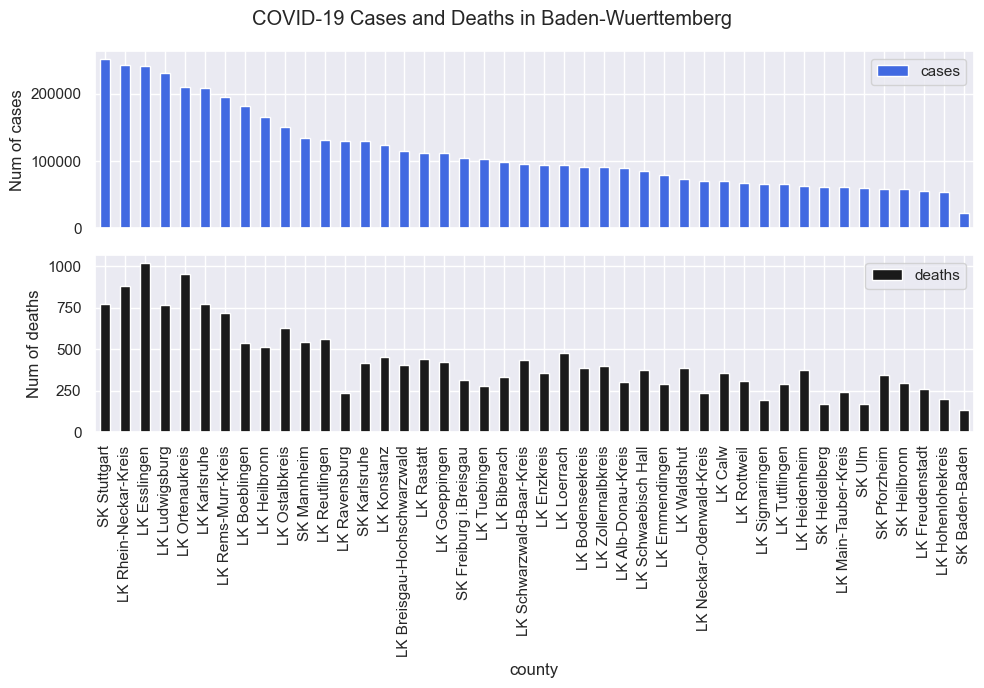

In [152]:
#Breake to 3 df by state

BadenWuerttemberg = CovidBycounty.loc['Baden-Wuerttemberg']
BadenWuerttemberg=BadenWuerttemberg.sort_values('cases', ascending=False)

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(10,7))
BadenWuerttemberg['cases'].plot.bar(ax=axes[0],legend='cases', color='royalblue' )
axes[0].set_ylabel('Num of cases')
BadenWuerttemberg['deaths'].plot.bar(ax=axes[1],legend='death',color='k' )
axes[1].set_ylabel('Num of deaths')
fig.suptitle('COVID-19 Cases and Deaths in Baden-Wuerttemberg')
fig.tight_layout()

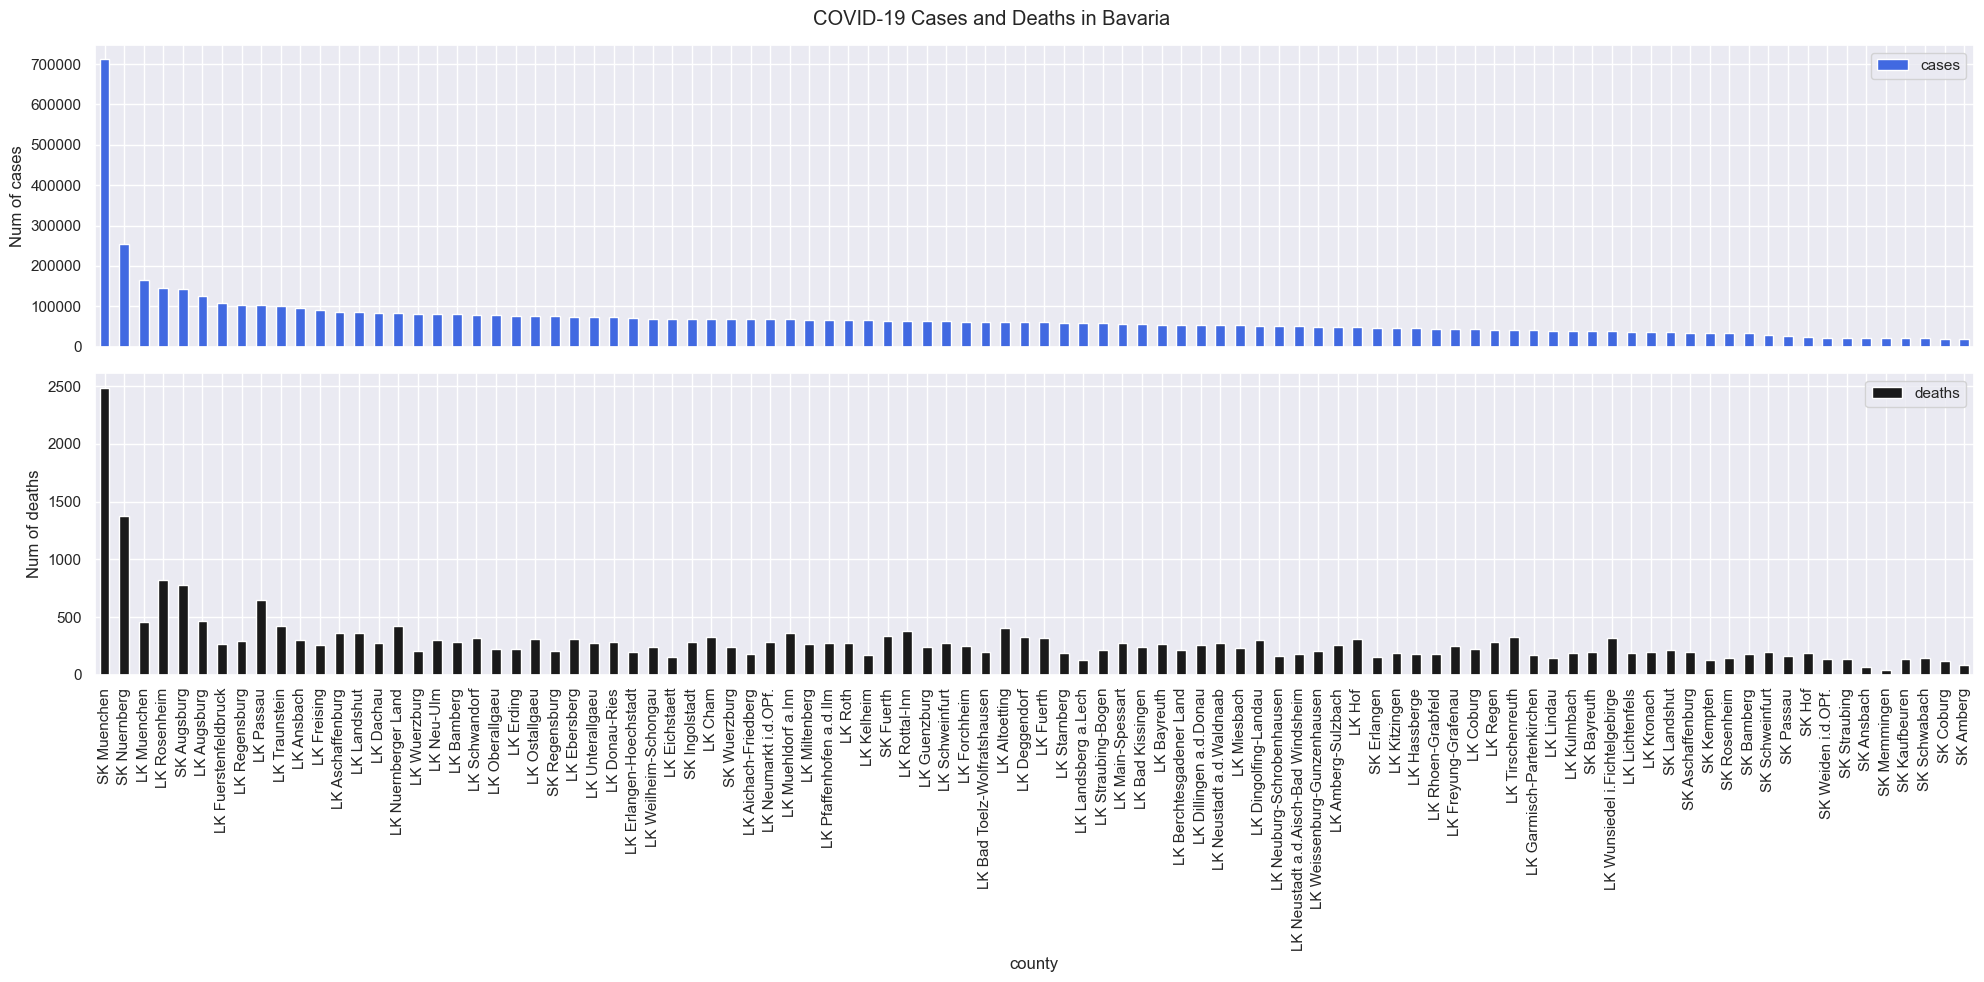

In [153]:
Bayern = CovidBycounty.loc['Bayern']
Bayern=Bayern.sort_values('cases', ascending=False)

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(20,10))
Bayern['cases'].plot.bar(ax=axes[0],legend='cases', color='royalblue' )
axes[0].set_ylabel('Num of cases')
Bayern['deaths'].plot.bar(ax=axes[1],legend='death',color='k' )
axes[1].set_ylabel('Num of deaths')
fig.suptitle('COVID-19 Cases and Deaths in Bavaria')
fig.tight_layout()

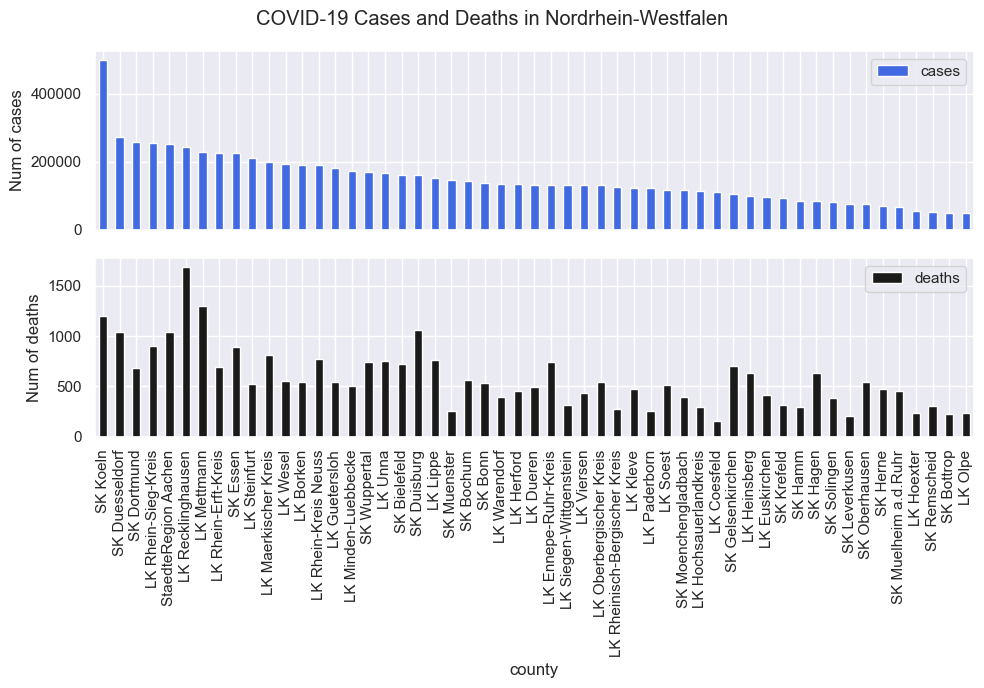

In [154]:
NordrheinWestfalen = CovidBycounty.loc['Nordrhein-Westfalen']
NordrheinWestfalen =NordrheinWestfalen .sort_values('cases', ascending=False)

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(10,7))
NordrheinWestfalen['cases'].plot.bar(ax=axes[0],legend='cases', color='royalblue' )
axes[0].set_ylabel('Num of cases')
NordrheinWestfalen['deaths'].plot.bar(ax=axes[1],legend='death',color='k' )
axes[1].set_ylabel('Num of deaths')
fig.suptitle('COVID-19 Cases and Deaths in Nordrhein-Westfalen')
fig.tight_layout()

#### sort the counties to see the ones with most cases

In [131]:
BadenWuerttemberg['cases'].sort_values(ascending=False)

county
SK Stuttgart                   248515
LK Rhein-Neckar-Kreis          239079
LK Esslingen                   239031
LK Ludwigsburg                 228449
LK Ortenaukreis                208182
LK Karlsruhe                   205662
LK Rems-Murr-Kreis             193761
LK Boeblingen                  180654
LK Heilbronn                   164195
LK Ostalbkreis                 148744
SK Mannheim                    133048
LK Reutlingen                  129776
LK Ravensburg                  128926
SK Karlsruhe                   128174
LK Konstanz                    122898
LK Breisgau-Hochschwarzwald    114390
LK Rastatt                     111470
LK Goeppingen                  110945
SK Freiburg i.Breisgau         103719
LK Tuebingen                   101615
LK Biberach                     97413
LK Schwarzwald-Baar-Kreis       95085
LK Enzkreis                     93542
LK Loerrach                     92896
LK Bodenseekreis                91084
LK Zollernalbkreis              89748
LK Al

In [132]:
NordrheinWestfalen['cases'].sort_values(ascending=False)

county
SK Koeln                         491037
SK Duesseldorf                   267193
SK Dortmund                      251767
LK Rhein-Sieg-Kreis              247035
StaedteRegion Aachen             246520
LK Recklinghausen                237741
LK Mettmann                      221679
SK Essen                         220783
LK Rhein-Erft-Kreis              220484
LK Steinfurt                     207612
LK Maerkischer Kreis             194903
LK Wesel                         189969
LK Borken                        188766
LK Rhein-Kreis Neuss             186192
LK Guetersloh                    178104
LK Minden-Luebbecke              169773
SK Wuppertal                     164296
LK Unna                          162125
SK Bielefeld                     157154
SK Duisburg                      156267
LK Lippe                         148521
SK Muenster                      142277
SK Bochum                        138986
SK Bonn                          136297
LK Warendorf                     

The big cities show higher number of cases and deaths

## COVID analysis

In [44]:
covid

,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2020-03-27,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-03-28,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-04-03,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-10-18,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-10-22,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
...,...,...,...,...,...,...,...
2021-12-01,Thueringen,SK Weimar,NaN,F,1,0,1
2021-12-23,Thueringen,SK Weimar,NaN,F,1,0,1
2022-08-11,Thueringen,SK Weimar,NaN,F,1,0,1


In [99]:
#Add cumulative colums
covid['recovered_cum']=covid['recovered'].cumsum()
covid['cases_cum']=covid['cases'].cumsum()
covid['deaths_cum']=covid['deaths'].cumsum()
covid.head(10)


,state,county,age_group,gender,cases,deaths,recovered,recovered_cum,cases_cum,deaths_cum
date,,,,,,,,,,
2020-01-28,Bayern,LK Landsberg a.Lech,15-34,M,1,0,1,1,1,0
2020-01-28,Bayern,LK Starnberg,35-59,M,1,0,1,2,2,0
2020-01-29,Bayern,LK Fuerstenfeldbruck,15-34,M,1,0,1,3,3,0
2020-01-29,Bayern,SK Muenchen,15-34,F,1,0,1,4,4,0
2020-01-31,Bayern,LK Traunstein,00-04,F,1,0,1,5,5,0
2020-01-31,Bayern,LK Fuerstenfeldbruck,35-59,M,1,0,1,6,6,0
2020-01-31,Bayern,LK Traunstein,35-59,M,1,0,1,7,7,0
2020-01-31,Saarland,LK Neunkirchen,15-34,F,1,0,1,8,8,0
2020-02-01,Bayern,LK Dachau,15-34,M,1,0,1,9,9,0


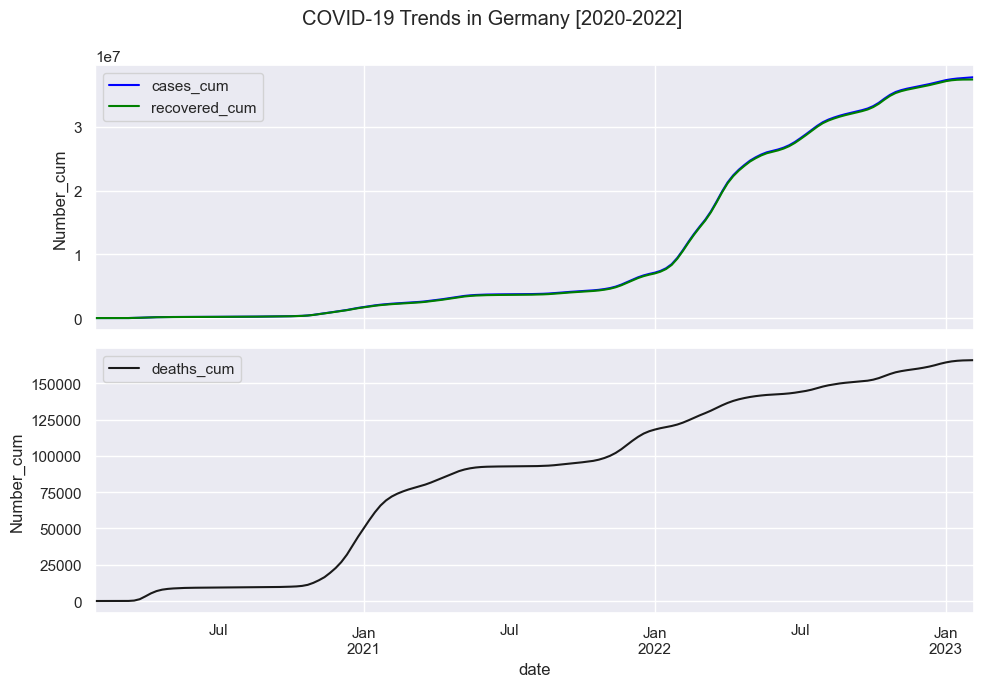

In [104]:
# create subplots to visualise recovery cases and deaths ( same x axis)

week_covid=covid.resample('W').mean() # resize to weeks to have better graphic presentation

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(10,7))
fig.suptitle ("COVID-19 Trends in Germany [2020-2022]")
week_covid[['cases_cum','recovered_cum']].plot(ax=axes[0],legend='cases', color=['blue','green'],ylabel="Number_cum" )
week_covid['deaths_cum'].plot(ax=axes[1],legend='deaths',color='k',ylabel="Number_cum")
fig.tight_layout()
plt.show()




In [119]:
#the percentage of cases from total population
cases_total=(covid['cases_cum'].max()*100)/total_population
print(f'The percentage of cases from total population is {cases_total} \n')

#the percentage of recovered from number of cases
recovery=(covid['recovered_cum'].max()*100)/covid['cases_cum'].max()
print(f'The percentage of recovered from number of cases is {recovery}\n')

#the percentage of death from number of cases
death=(covid['deaths_cum'].max()*100)/covid['cases_cum'].max()
print(f'The percentage of death from number of cases is {death}\n')

#What is the  death ratio from total population ?
death_total=(covid['deaths_cum'].max()/demo['population'].sum())*100
print(f'The percentage of death from total population is {death_total}\n')

The percentage of cases from total population is 45.543219013651694 

The percentage of recovered from number of cases is 98.9787308637997

The percentage of death from number of cases is 0.43908399824785344

The percentage of death from total population is 0.19997298697591845



#### Is there a correlation between cases and recovery?

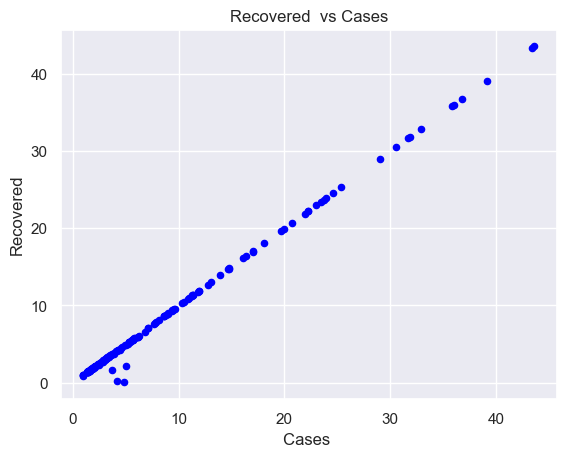

In [107]:
week_covid.plot.scatter(x='cases',y='recovered',color='blue')
plt.title('Recovered  vs Cases')
plt.xlabel('Cases ')
plt.ylabel('Recovered')
plt.show()

#linear correlation. There is a small part out of the main line  due to high deaths in the begining of the pandemic.

#### Is there a correlation between cases and death?

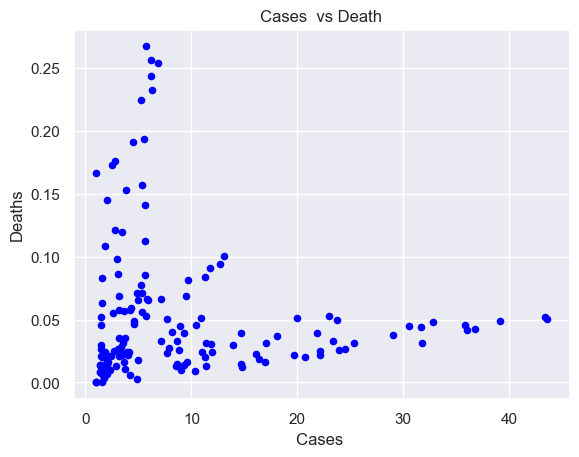

In [109]:
week_covid.plot.scatter(x='cases',y='deaths',color='blue')
plt.title('Cases  vs Death')
plt.xlabel('Cases ')
plt.ylabel('Deaths')
plt.show()

#No correlation.In the begining of the pandemic death rate was high.
#But after vaccination it droped and number of cases rised. 
#So we don't see a correlation between death and cases.

#### Are certain age groups have more tendency to infection and /or death?

In [39]:
age=covid.groupby('age_group')[["cases","deaths"]].sum()

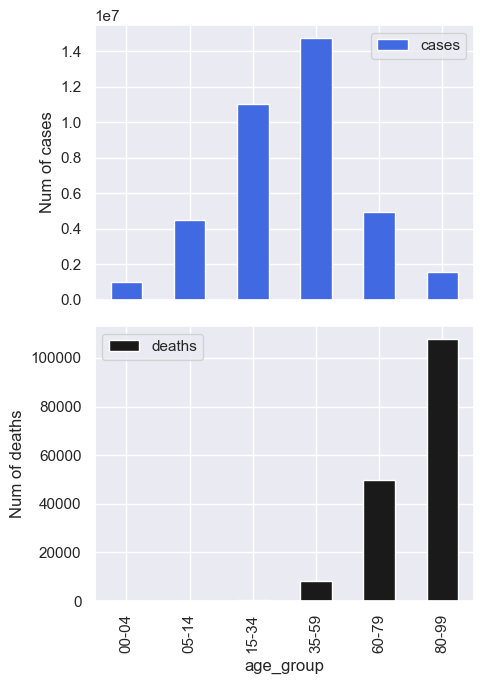

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(5,7))
age['cases'].plot.bar(ax=axes[0],legend='cases', color='royalblue' )
age['deaths'].plot.bar(ax=axes[1],legend='death',color='k' )

axes[0].set_ylabel('Num of cases')
axes[1].set_ylabel('Num of deaths')
fig.tight_layout()

Older people diy more from COVID . The older they are the higher are the chance to die
Young adults and mature people (15-59) are infected more then children or old people.

#### Are there differences between genders in getting sick, recovery ratio, death ratio

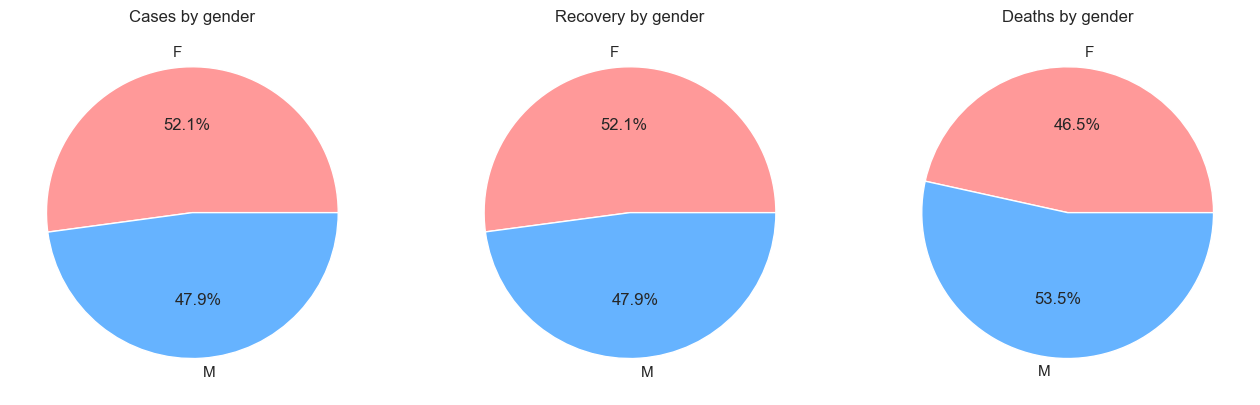

In [45]:
gender = covid_gender.groupby('gender').sum()
gender.sort_values('cases', ascending=False, inplace=True)


plt.figure(figsize=(16,20))
the_grid = GridSpec(2, 3)
plt.subplot(the_grid[0, 0], aspect=1, title='Cases by gender')
colors = ['#ff9999','#66b3ff','#99ff99']
cases_pie = plt.pie(gender.cases, labels=gender.index, autopct='%1.1f%%',colors=colors)

plt.subplot(the_grid[0, 1], aspect=1, title='Recovery by gender')
recovery_pie = plt.pie(gender.recovered, labels=gender.index, autopct='%1.1f%%',colors=colors)

plt.subplot(the_grid[0, 2], aspect=1, title='Deaths by gender')
death_pie = plt.pie(gender.deaths, labels=gender.index, autopct='%1.1f%%',colors=colors)

## Vaccines analysis

### manufacturers

In [8]:
vaccines

,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul
date,,,,,,,,
2020-12-27,24427,24427,0,24418,8,1,24427,0
2020-12-28,18073,18073,0,42489,9,2,42500,0
2020-12-29,50229,50229,0,92717,9,3,92729,0
2020-12-30,64213,64213,0,156929,10,3,156942,0
2020-12-31,49985,49985,0,206912,12,3,206927,0
...,...,...,...,...,...,...,...,...
2023-01-18,15120,688,312,138014658,31577922,12803023,64866267,63553167
2023-01-19,16594,314,381,138015809,31577955,12803023,64866581,63553548
2023-01-20,10565,334,235,138016521,31578012,12803023,64866915,63553783


In [10]:
# Add colums with manufacturers - convert the cummulative sum into real values
vaccines['pfizer']=vaccines['pfizer_cumul'].diff().fillna(vaccines['pfizer_cumul'].iloc[0])
vaccines['moderna']=vaccines['moderna_cumul'].diff().fillna(vaccines['moderna_cumul'].iloc[0])
vaccines['astrazeneca']=vaccines['astrazeneca_cumul'].diff().fillna(vaccines['astrazeneca_cumul'].iloc[0])
vaccines.head()


,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul,pfizer,moderna,astrazeneca
date,,,,,,,,,,,
2020-12-27,24427,24427,0,24418,8,1,24427,0,24418.0,8.0,1.0
2020-12-28,18073,18073,0,42489,9,2,42500,0,18071.0,1.0,1.0
2020-12-29,50229,50229,0,92717,9,3,92729,0,50228.0,0.0,1.0
2020-12-30,64213,64213,0,156929,10,3,156942,0,64212.0,1.0,0.0
2020-12-31,49985,49985,0,206912,12,3,206927,0,49983.0,2.0,0.0


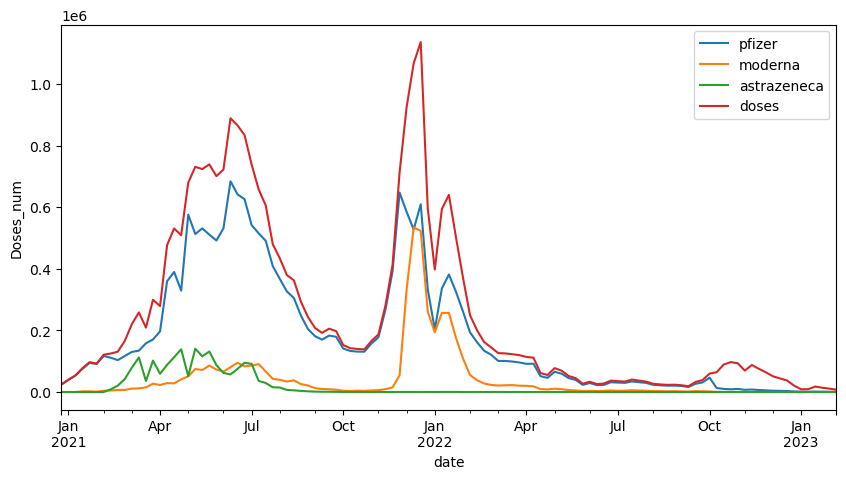

In [11]:
#What is the contribution of each manufacturer?
week_vac=vaccines.resample('W').mean()
week_vac[['pfizer', 'moderna','astrazeneca','doses']].plot(figsize=(10,5), ylabel="Doses_num")
plt.show()
#The most commony used manufacturer in Germany is pfizer
#Looks like there is other manufacturers present

In [12]:
#Does all manufacturers sum to the daily doses number?
#len(vaccines[vaccines['doses']==vaccines['pfizer']+vaccines['moderna']+vaccines['astrazeneca']].index)
print(f"There are only {len(vaccines[(vaccines['doses'] == vaccines['pfizer'] + vaccines['moderna'] + vaccines['astrazeneca'])].index)} days in which all manufacturers sum to the daily doses number")
vaccines[vaccines['doses']==vaccines['pfizer']+vaccines['moderna']+vaccines['astrazeneca'] ].index
#There are other manufacturers not presented in the data

There are only 43 days in which all manufacturers sum to the daily doses number


DatetimeIndex(['2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-03', '2021-01-05', '2021-01-06',
               '2021-01-08', '2021-01-09', '2021-01-11', '2021-01-13',
               '2021-01-14', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-22', '2021-01-23', '2021-01-25', '2021-01-26',
               '2021-01-28', '2021-02-04', '2021-02-09', '2021-02-25',
               '2021-02-26', '2021-03-01', '2021-03-02', '2021-03-04',
               '2021-03-06', '2021-03-07', '2021-03-09', '2021-03-11',
               '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16',
               '2021-03-18', '2021-03-19', '2021-03-20', '2021-03-22',
               '2021-04-03', '2021-04-05', '2021-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [13]:
#create another colum for other manufacturers
vaccines['other']=vaccines['doses']-(vaccines['moderna']+vaccines['astrazeneca']+vaccines['pfizer'])
vaccines

,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul,pfizer,moderna,astrazeneca,other
date,,,,,,,,,,,,
2020-12-27,24427,24427,0,24418,8,1,24427,0,24418.0,8.0,1.0,0.0
2020-12-28,18073,18073,0,42489,9,2,42500,0,18071.0,1.0,1.0,0.0
2020-12-29,50229,50229,0,92717,9,3,92729,0,50228.0,0.0,1.0,0.0
2020-12-30,64213,64213,0,156929,10,3,156942,0,64212.0,1.0,0.0,0.0
2020-12-31,49985,49985,0,206912,12,3,206927,0,49983.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,11002,174,181,138179497,31584858,12803049,64869802,63555851,918.0,13.0,0.0,10071.0
2023-02-02,12845,215,192,138180485,31584864,12803049,64870017,63556043,988.0,6.0,0.0,11851.0
2023-02-03,8734,198,153,138181255,31584869,12803049,64870215,63556196,770.0,5.0,0.0,7959.0


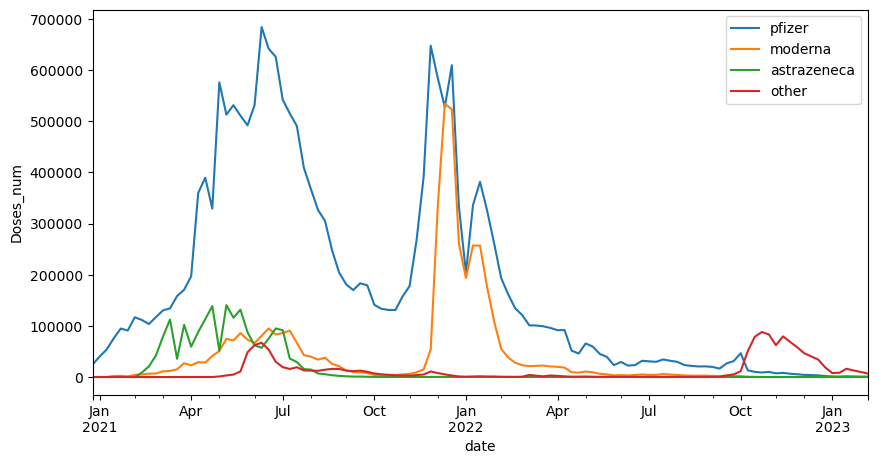

In [14]:
#What is the contribution of each manufacturer (including other manufactorers)?
week_vac=vaccines.resample('W').mean()
week_vac[['pfizer', 'moderna','astrazeneca','other']].plot(figsize=(10,5), ylabel="Doses_num")
plt.show()

In [15]:
#Create coulmns of percentage for each manufacturer
vaccines['pfizer%']=(vaccines['pfizer']/vaccines['doses'])*100
vaccines['moderna%']=(vaccines['moderna']/vaccines['doses'])*100
vaccines['astrazeneca%']=(vaccines['astrazeneca']/vaccines['doses'])*100
vaccines['other%']=(vaccines['other']/vaccines['doses'])*100
print(vaccines.shape)
vaccines.tail(10)
#df[percent] = (df['column_name'] / df['column_name'].sum()) * 100

(771, 16)


,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul,pfizer,moderna,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%
date,,,,,,,,,,,,,,,,
2023-01-27,12438,186,151,138176598,31584572,12803048,64869169,63555411,1004.0,78.0,0.0,11356.0,8.072037,0.627110,0.000000,91.300852
2023-01-28,2847,60,45,138176848,31584654,12803048,64869229,63555456,250.0,82.0,0.0,2515.0,8.781173,2.880225,0.000000,88.338602
2023-01-29,679,8,11,138176956,31584654,12803048,64869237,63555467,108.0,0.0,0.0,571.0,15.905744,0.000000,0.000000,84.094256
2023-01-30,7007,150,83,138177493,31584725,12803049,64869387,63555550,537.0,71.0,1.0,6398.0,7.663765,1.013272,0.014271,91.308691
2023-01-31,11690,241,120,138178579,31584845,12803049,64869628,63555670,1086.0,120.0,0.0,10484.0,9.289991,1.026518,0.000000,89.683490
2023-02-01,11002,174,181,138179497,31584858,12803049,64869802,63555851,918.0,13.0,0.0,10071.0,8.343937,0.118160,0.000000,91.537902
2023-02-02,12845,215,192,138180485,31584864,12803049,64870017,63556043,988.0,6.0,0.0,11851.0,7.691709,0.046711,0.000000,92.261580
2023-02-03,8734,198,153,138181255,31584869,12803049,64870215,63556196,770.0,5.0,0.0,7959.0,8.816121,0.057248,0.000000,91.126632
2023-02-04,1707,60,34,138181336,31584878,12803049,64870275,63556230,81.0,9.0,0.0,1617.0,4.745167,0.527241,0.000000,94.727592


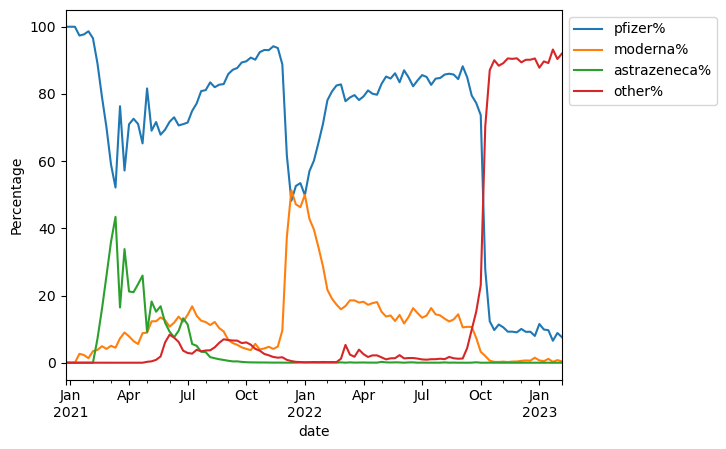

In [16]:
#What is the percentage  of each manufacturer?

week_vac=vaccines.resample('W').mean()
week_vac[['pfizer%', 'moderna%','astrazeneca%','other%']].plot(ylabel='Percentage')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# In Jan 22 it was a reduction in pfizer use that was replaced by moderna
#astrazeneca was mainly used in the begining Feb-Jul 21 and abundunt afterwords. 
#Starting from Sep 2022 there is a shift to other manufacturers.

### Vaccination patterns

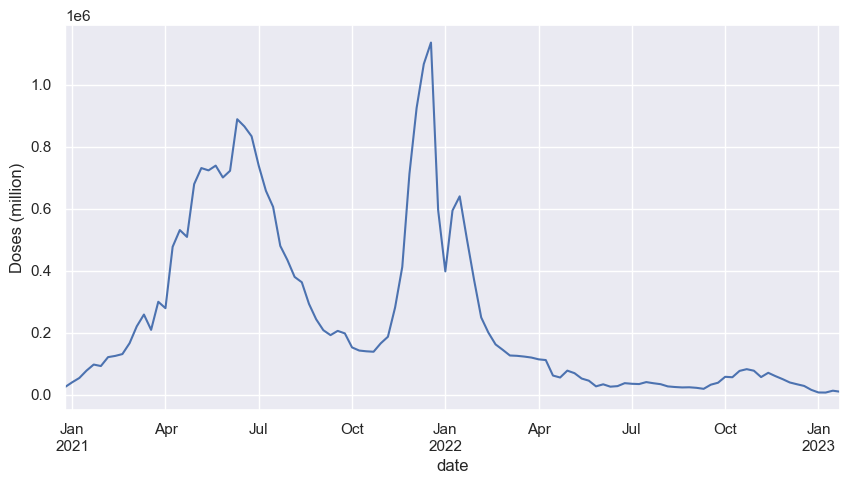

In [40]:
#Vaccination pattern
week_vac['doses'].plot(ylabel="Doses (million)", figsize=(10,5))
plt.show()


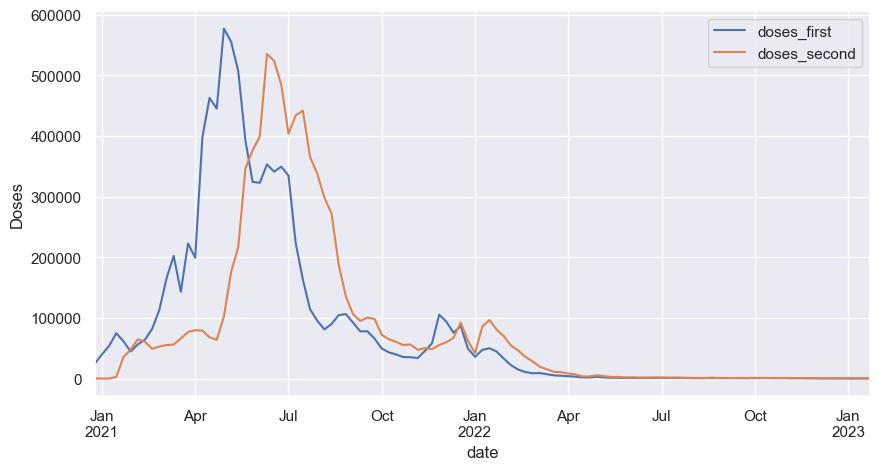

In [41]:
#First vs second dose pattern
week_vac[['doses_first', 'doses_second']].plot(ylabel="Doses", figsize=(10,5))
plt.show()

# There is an expected shifting of 3 mounths between 1st and 2nd dose.

In [17]:
#when dose1+dose2 ==daily doses?
print(f"There are only {len(vaccines[(vaccines['doses']==vaccines['doses_first']+vaccines['doses_second'])].index)} \
dates in which dose1 +dose2 =total daily doses")

There are only 155 dates in which dose1 +dose2 =total daily doses


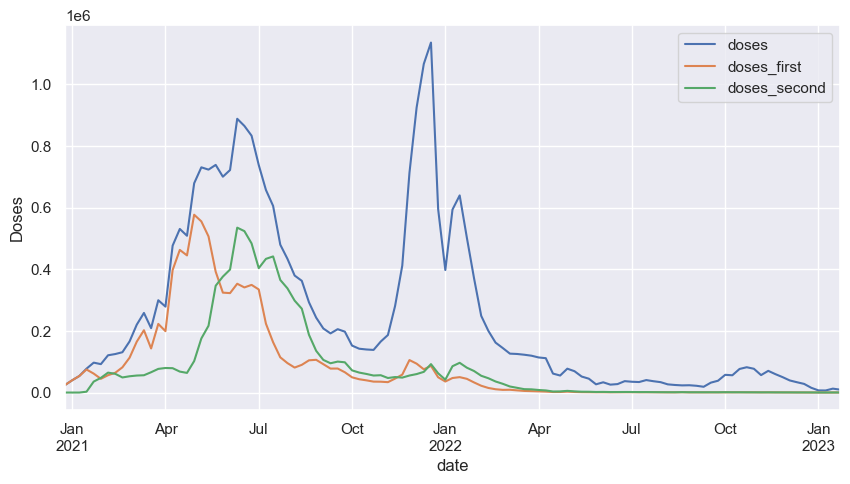

In [43]:
#total doses , first and second plot
week_vac[['doses', 'doses_first', 'doses_second']].plot(ylabel="Doses", figsize=(10,5))
plt.show()
# There is a third dose not presented in the data

In [18]:
#calculate the third dose and add as another column
vaccines['doses_third']=vaccines['doses']-(vaccines['doses_first']+vaccines['doses_second'])
vaccines.head()

,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul,pfizer,moderna,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%,doses_third
date,,,,,,,,,,,,,,,,,
2020-12-27,24427,24427,0,24418,8,1,24427,0,24418.0,8.0,1.0,0.0,99.963156,0.032751,0.004094,0.0,0
2020-12-28,18073,18073,0,42489,9,2,42500,0,18071.0,1.0,1.0,0.0,99.988934,0.005533,0.005533,0.0,0
2020-12-29,50229,50229,0,92717,9,3,92729,0,50228.0,0.0,1.0,0.0,99.998009,0.000000,0.001991,0.0,0
2020-12-30,64213,64213,0,156929,10,3,156942,0,64212.0,1.0,0.0,0.0,99.998443,0.001557,0.000000,0.0,0
2020-12-31,49985,49985,0,206912,12,3,206927,0,49983.0,2.0,0.0,0.0,99.995999,0.004001,0.000000,0.0,0


In [45]:
#create another column with fully vacinated people ( caculate from cumsum)
vaccines['persons_full']=vaccines['persons_full_cumul'].diff().fillna(vaccines['persons_full_cumul'].iloc[0])
new_cols=['doses', 'doses_first', 'doses_second', 'doses_third','persons_full', 'persons_first_cumul', 'persons_full_cumul',
          'pfizer_cumul', 'moderna_cumul','astrazeneca_cumul', 
       'pfizer', 'moderna', 'astrazeneca', 'other','pfizer%', 'moderna%','astrazeneca%','other%']
vaccines=vaccines.reindex(columns=new_cols)
vaccines.tail(10)
#persons_full= 2 doses of vaccine ( not 3)

,doses,doses_first,doses_second,doses_third,persons_full,persons_first_cumul,persons_full_cumul,pfizer_cumul,moderna_cumul,astrazeneca_cumul,pfizer,moderna,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%
date,,,,,,,,,,,,,,,,,,
2023-01-13,17508,371,342,16795,342.0,64865053,63552354,138011328,31577742,12803023,1176.0,206.0,1.0,16125.0,6.716929,1.176605,0.005712,92.100754
2023-01-14,2901,63,68,2770,68.0,64865116,63552422,138011559,31577752,12803023,231.0,10.0,0.0,2660.0,7.962771,0.344709,0.000000,91.692520
2023-01-15,1536,27,33,1476,33.0,64865143,63552455,138011843,31577843,12803023,284.0,91.0,0.0,1161.0,18.489583,5.924479,0.000000,75.585938
2023-01-16,6997,134,148,6715,148.0,64865277,63552603,138012394,31577873,12803023,551.0,30.0,0.0,6416.0,7.874803,0.428755,0.000000,91.696441
2023-01-17,14922,302,252,14368,252.0,64865579,63552855,138013524,31577881,12803023,1130.0,8.0,0.0,13784.0,7.572711,0.053612,0.000000,92.373676
2023-01-18,15120,688,312,14120,312.0,64866267,63553167,138014658,31577922,12803023,1134.0,41.0,0.0,13945.0,7.500000,0.271164,0.000000,92.228836
2023-01-19,16594,314,381,15899,381.0,64866581,63553548,138015809,31577955,12803023,1151.0,33.0,0.0,15410.0,6.936242,0.198867,0.000000,92.864891
2023-01-20,10565,334,235,9996,235.0,64866915,63553783,138016521,31578012,12803023,712.0,57.0,0.0,9796.0,6.739233,0.539517,0.000000,92.721249
2023-01-21,1395,45,19,1331,19.0,64866960,63553802,138016565,31578013,12803023,44.0,1.0,0.0,1350.0,3.154122,0.071685,0.000000,96.774194


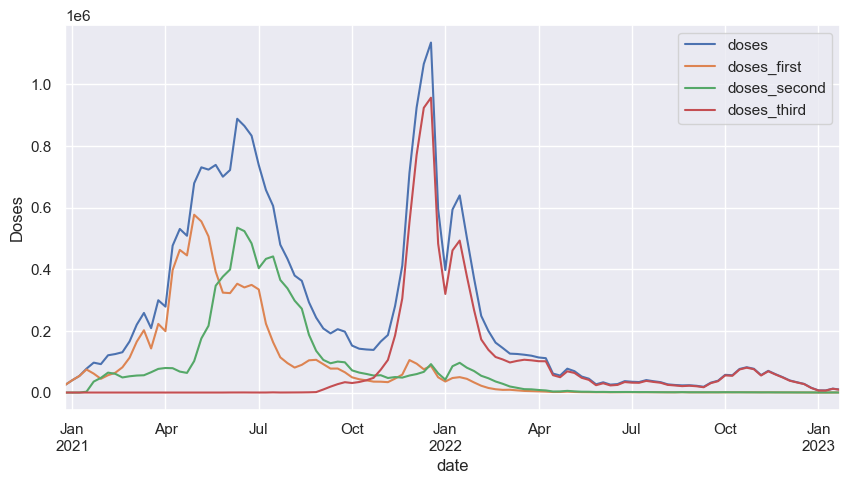

In [46]:
#Present total doses, first, second and third
week_vac=vaccines.resample('W').mean()
week_vac[['doses', 'doses_first', 'doses_second','doses_third']].plot(ylabel="Doses", figsize=(10,5))
plt.show()

In [19]:
#calculate cumsum for third dose
vaccines['persons_third_cumul']=vaccines['doses_third'].cumsum()
vaccines


,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul,pfizer,moderna,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%,doses_third,persons_third_cumul
date,,,,,,,,,,,,,,,,,,
2020-12-27,24427,24427,0,24418,8,1,24427,0,24418.0,8.0,1.0,0.0,99.963156,0.032751,0.004094,0.000000,0,0
2020-12-28,18073,18073,0,42489,9,2,42500,0,18071.0,1.0,1.0,0.0,99.988934,0.005533,0.005533,0.000000,0,0
2020-12-29,50229,50229,0,92717,9,3,92729,0,50228.0,0.0,1.0,0.0,99.998009,0.000000,0.001991,0.000000,0,0
2020-12-30,64213,64213,0,156929,10,3,156942,0,64212.0,1.0,0.0,0.0,99.998443,0.001557,0.000000,0.000000,0,0
2020-12-31,49985,49985,0,206912,12,3,206927,0,49983.0,2.0,0.0,0.0,99.995999,0.004001,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,11002,174,181,138179497,31584858,12803049,64869802,63555851,918.0,13.0,0.0,10071.0,8.343937,0.118160,0.000000,91.537902,10647,65843160
2023-02-02,12845,215,192,138180485,31584864,12803049,64870017,63556043,988.0,6.0,0.0,11851.0,7.691709,0.046711,0.000000,92.261580,12438,65855598
2023-02-03,8734,198,153,138181255,31584869,12803049,64870215,63556196,770.0,5.0,0.0,7959.0,8.816121,0.057248,0.000000,91.126632,8383,65863981


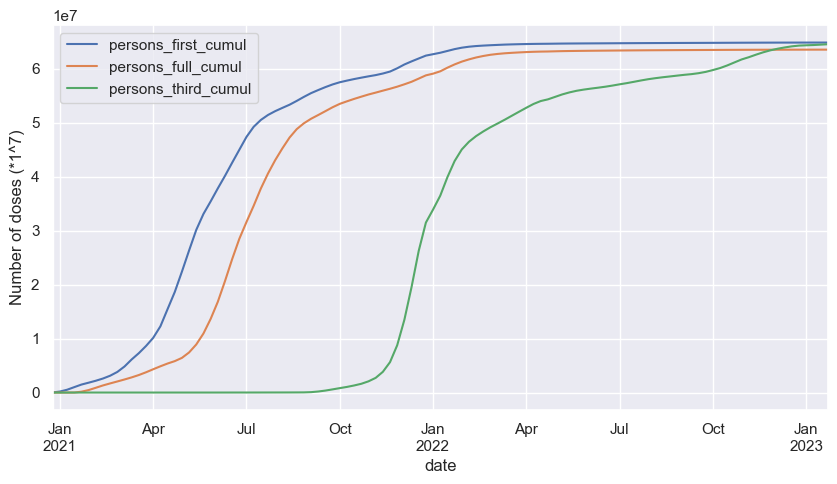

In [48]:
#What is the cumulative percentage vaccination per doses?

week_vac=vaccines.resample('W').mean()
week_vac[['persons_first_cumul', 'persons_full_cumul','persons_third_cumul']].plot(ylabel="Number of doses (*1^7)", figsize=(10,5))
plt.show()

#The vaccination process was done "by the book", 1st dose, 3 mounths later 2nd dose and 6 months later 3rd dose.
#Most population is very disciplined and obeys the government guidance.

In [21]:
#Calculate the % of each dose from total population

#Total population in Germany
total_population=demo['population'].sum()

#calculate % of vaccinated with first, second, third dose out of total population
vaccines['first_dose%']=(vaccines['persons_first_cumul']/total_population)*100
vaccines['second_dose%']=(vaccines['persons_full_cumul']/total_population)*100
vaccines['third_dose%']=(vaccines['persons_third_cumul']/total_population)*100

vaccines.tail()


,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul,pfizer,moderna,...,pfizer%,moderna%,astrazeneca%,other%,doses_third,persons_third_cumul,first_dose%,second_dose%,third_dose%,full_vac%
date,,,,,,,,,,,,,,,,,,,,,
2023-02-01,11002,174,181,138179497,31584858,12803049,64869802,63555851,918.0,13.0,...,8.343937,0.118160,0.0,91.537902,10647,65843160,78.138300,76.555593,79.310749,234.004643
2023-02-02,12845,215,192,138180485,31584864,12803049,64870017,63556043,988.0,6.0,...,7.691709,0.046711,0.0,92.261580,12438,65855598,78.138559,76.555824,79.325732,234.020115
2023-02-03,8734,198,153,138181255,31584869,12803049,64870215,63556196,770.0,5.0,...,8.816121,0.057248,0.0,91.126632,8383,65863981,78.138798,76.556009,79.335829,234.030636
2023-02-04,1707,60,34,138181336,31584878,12803049,64870275,63556230,81.0,9.0,...,4.745167,0.527241,0.0,94.727592,1613,65865594,78.138870,76.556050,79.337772,234.032692
2023-02-05,622,6,4,138181378,31584878,12803049,64870281,63556234,42.0,0.0,...,6.752412,0.000000,0.0,93.247588,612,65866206,78.138877,76.556055,79.338509,234.033441


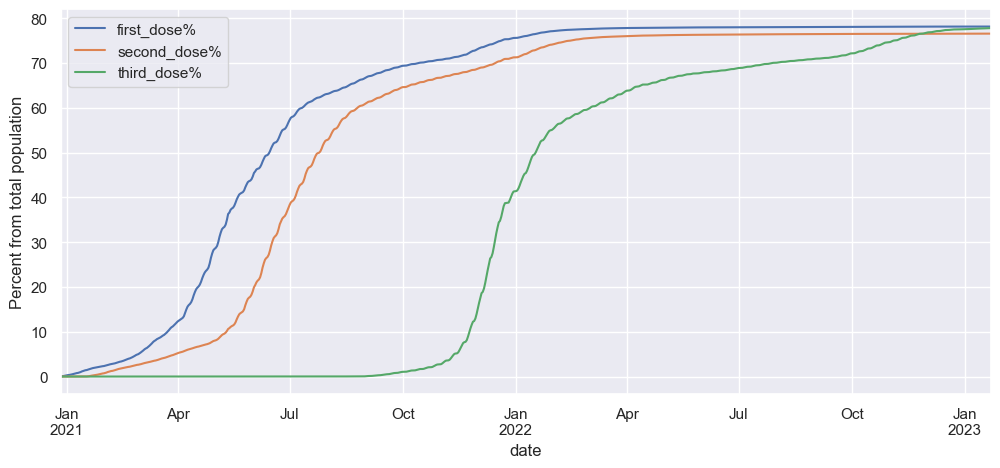

In [89]:
#The percentage of total population vaccinated
vaccines[['first_dose%','second_dose%','third_dose%']].plot(ylabel="Percent from total population", figsize=(12,5))
plt.show()

#Almost identical to the previous graph.
#With same conclusions.

## Effect of vaccination on number of cases and deaths

In [4]:
covid

,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2020-03-27,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-03-28,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-04-03,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-10-18,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-10-22,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
...,...,...,...,...,...,...,...
2021-12-23,Thueringen,SK Weimar,NaN,F,1,0,1
2022-08-11,Thueringen,SK Weimar,NaN,F,1,0,1
2022-09-19,Thueringen,SK Weimar,NaN,F,1,0,1


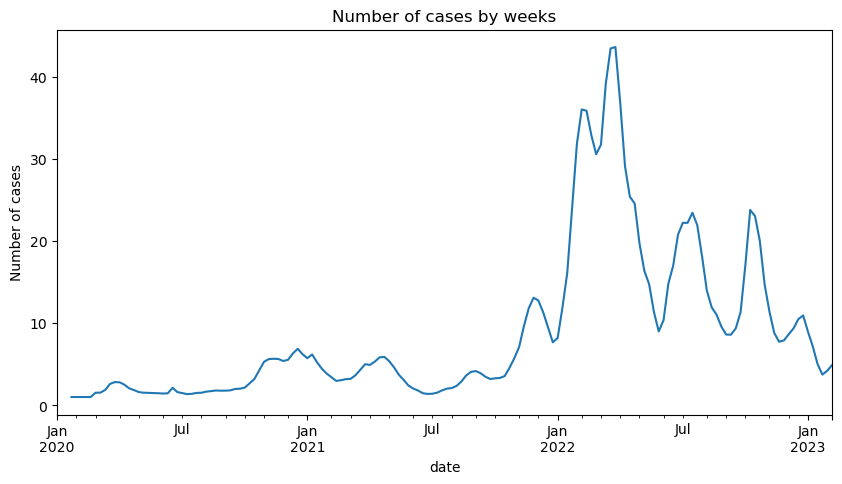

In [29]:

week_covid=covid.resample('W').mean()
week_covid['cases'].plot(figsize=(10,5),ylabel="Number of cases", title="Number of cases by weeks")
plt.show()

In [31]:
#Join covid data with vaccination

covid_vaccines = covid.join(vaccines, how = 'left') 
print(covid_vaccines.shape)
covid_vaccines.sample(3)

(2890909, 32)


,state,county,age_group,gender,cases,deaths,recovered,recovered_cum,cases_cum,deaths_cum,...,pfizer%,moderna%,astrazeneca%,other%,doses_third,persons_third_cumul,first_dose%,second_dose%,third_dose%,full_vac%
date,,,,,,,,,,,,,,,,,,,,,
2022-08-05,Bayern,LK Wunsiedel i.Fichtelgebirge,60-79,F,6,0,6,9615553,9700424,38266,...,86.567483,12.699334,0.003055,0.730128,30493.0,58324089.0,78.023422,76.420325,70.253724,224.697471
2022-12-12,Baden-Wuerttemberg,SK Karlsruhe,60-79,F,23,0,23,4454034,4493886,16799,...,10.070266,0.214497,0.000000,89.715237,26385.0,65031323.0,78.125312,76.541692,78.332859,232.999862
2022-06-23,Schleswig-Holstein,SK Kiel,80-99,F,2,0,2,36431176,36806363,157380,...,87.395961,12.114261,0.009300,0.480479,60440.0,56924566.0,77.973388,76.346420,68.567942,222.887750


In [60]:
covid_vaccines.columns

Index(['state', 'county', 'age_group', 'gender', 'cases', 'deaths',
       'recovered', 'recovered_cum', 'cases_cum', 'deaths_cum', 'death%',
       'recovery%', 'doses', 'doses_first', 'doses_second', 'doses_third',
       'persons_full', 'persons_first_cumul', 'persons_full_cumul',
       'pfizer_cumul', 'moderna_cumul', 'astrazeneca_cumul', 'pfizer',
       'moderna', 'astrazeneca', 'other', 'pfizer%', 'moderna%',
       'astrazeneca%', 'other%', 'persons_third_cumul', 'first_dose%',
       'second_dose%', 'third_dose%'],
      dtype='object')

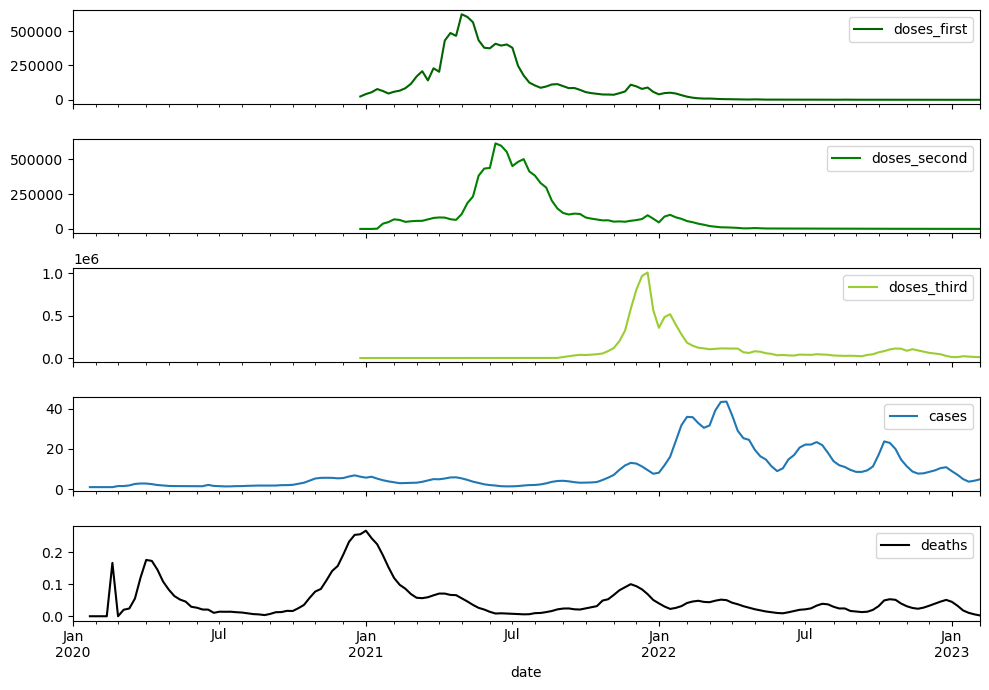

In [33]:
# create subplots to visualise vaccination doses with cases and deaths ( same x axis)

week_vac_cases=covid_vaccines.resample('W').mean() # resize to weeks to have better graphic presentation

fig, axes = plt.subplots(nrows=5, ncols=1, sharex=True,figsize=(10,7))
week_vac_cases['doses_first'].plot(ax=axes[0],legend='first_dose', color='darkgreen' )
week_vac_cases['doses_second'].plot(ax=axes[1],legend='second_dose',color='green' )
week_vac_cases['doses_third'].plot(ax=axes[2],legend='third_dose', color='yellowgreen' )
week_vac_cases['cases'].plot(ax=axes[3], legend='cases')
week_vac_cases['deaths'].plot(ax=axes[4],legend='deaths',color='k')
fig.tight_layout()


In [71]:
# the date then 60%  were vaccinated with first dose
print(vaccines.index[vaccines['first_dose%'].searchsorted(60)])

# the date then 50%  were vaccinated with first dose
print(vaccines.index[vaccines['first_dose%'].searchsorted(50)])

# the date then 60%  were vaccinated with second dose
print(vaccines.index[vaccines['second_dose%'].searchsorted(60)])

# the date then 60%  were vaccinated with third dose
print(vaccines.index[vaccines['third_dose%'].searchsorted(60)])


2021-07-12 00:00:00
2021-06-15 00:00:00
2021-08-26 00:00:00
2022-03-03 00:00:00


#### What is the death ratio before the begining of vaccination ?

In [72]:
#Calculate the death ratio before 50% of population were vaccinated
deaths0b=covid.loc[:'2020-12-27 00:00:00' ]['deaths'].sum() 
cases0b=covid.loc[:'2020-12-27 00:00:00' ]['cases'].sum()
print ( f'Number of deaths before  vaccination are {deaths0b} and number of cases are {cases0b}')

death_percent_b0=deaths0b/cases0b *100
print( f'percent of deaths before the begining of vaccination {death_percent_b0}')

 #Calculate the death ratio from the begining of vaccination
d=covid.loc['2020-12-27 00:00:00' :]['deaths'].sum() 
c=covid.loc['2020-12-27 00:00:00': ]['cases'].sum()
print ( f'Number of from begining of  vaccination are {d} and number of cases are {c}')

death_percent=d/c *100
print( f'percent of deaths from begining of vaccination {death_percent}')


Number of deaths before  vaccination are 46966 and number of cases are 1660161
percent of deaths before the begining of vaccination 2.8290027292533675
Number of from begining of  vaccination are 114332 and number of cases are 35561597
percent of deaths from begining of vaccination 0.3215041214262678


#### Count the percentage of deaths before and after first dose of vaccination (60% of population)

In [73]:

#before first dose
deaths1b=covid.loc[:'2021-07-12 00:00:00' ]['deaths'].sum() 
cases1b=covid.loc[:'2021-07-12 00:00:00' ]['cases'].sum()
print ( f'Number of deaths before 60% were vaccinated with first dose is {deaths1b} and number of cases is {cases1b}')

death_percent_b=deaths1b/cases1b *100
print( f'percent of deaths before 60% were vaccinated with first dose is {death_percent_b}')

#after first dose
deaths1a=covid.loc['2021-07-12 00:00:00' :]['deaths'].sum() 
cases1a=covid.loc['2021-07-12 00:00:00' :]['cases'].sum()
print ( f'\n Number of deaths after 60% were vaccinated with first dose is {deaths1a}and number of cases is {cases1a}')

death_percent_a=deaths1a/cases1a *100
print( f'percent of deaths before 60% were vaccinated with first dose is {death_percent_a}')

#There is a great decrease in death % out of all cases following first dose of vaccination from 2.5% to 0.21%

Number of deaths before 60% were vaccinated with first dose is 92790 and number of cases is 3735545
percent of deaths before 60% were vaccinated with first dose is 2.483974895229478

 Number of deaths after 60% were vaccinated with first dose is 67982and number of cases is 33477209
percent of deaths before 60% were vaccinated with first dose is 0.20306949722122894


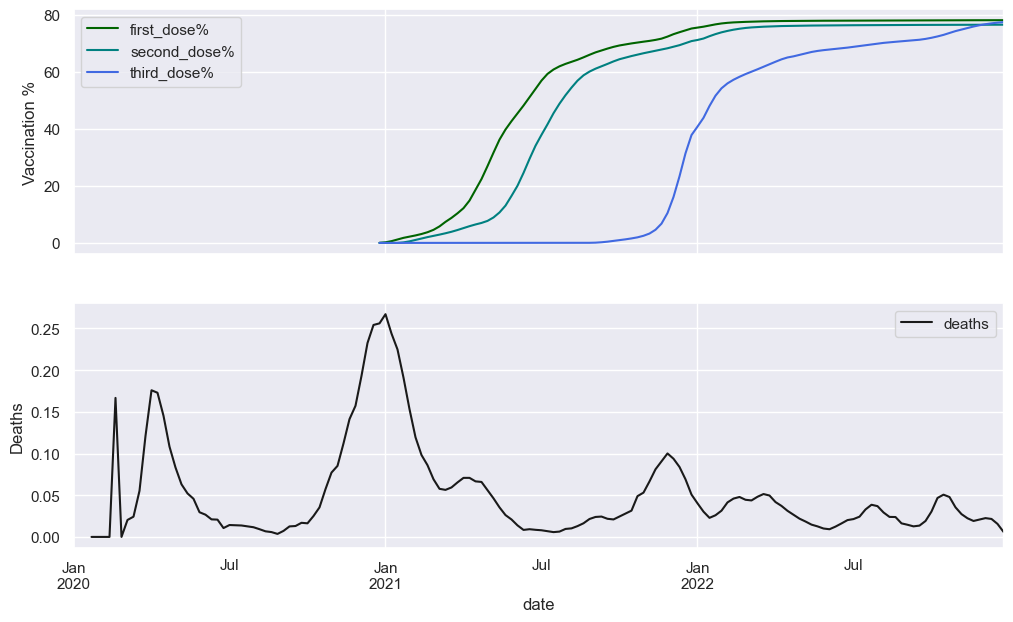

In [74]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(12,7))
week_vac_cases[['first_dose%','second_dose%','third_dose%']].plot(ax=axes[0],legend='first_dose%', color=['darkgreen', 'teal','royalblue'] )
week_vac_cases['deaths'].plot(ax=axes[1],legend='deaths',color='k')
#week_vac_cases['cases'].plot(ax=axes[2],legend='deaths',color='b')

# Set y-label for the first subplot
axes[0].set_ylabel('Vaccination %')

# Set y-label for the second subplot
axes[1].set_ylabel('Deaths')

#ax.set_ylable('Percentage of vaccinated with 1st dose')
plt.show()

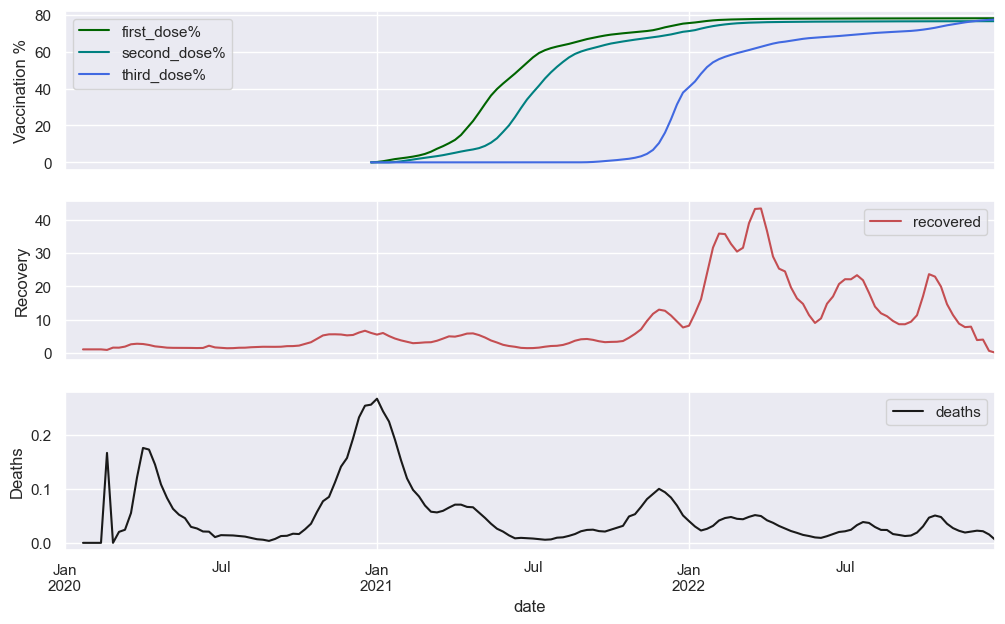

In [92]:
#Same graph with recovery

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True,figsize=(12,7))
week_vac_cases[['first_dose%','second_dose%','third_dose%']].plot(ax=axes[0],legend='first_dose%', color=['darkgreen', 'teal','royalblue'] )
week_vac_cases['recovered'].plot(ax=axes[1],legend='recovered',color='r')
week_vac_cases['deaths'].plot(ax=axes[2],legend='deaths',color='k')


# Set y-label for  subplots
axes[0].set_ylabel('Vaccination %')
axes[1].set_ylabel('Recovery')
axes[2].set_ylabel('Deaths')


plt.show()

#### Count the percentage of deaths from the begining of vaccination vs after 60% of population  got their third dose of vaccination

In [30]:
#calculate the percentage og deaths untill 60% were fully vaccinated ( 3 doses)
d3=covid.loc[:'2022-03-03 00:00:00', 'deaths'].sum()
c3=covid.loc[:'2022-03-03 00:00:00', 'cases'].sum()
death_percent3=d3/c3*100
print( f'percent of deaths untill 60% were vaccinated with third dose are {death_percent3}')

#from begining of vaccination - 60% vaccinated with 3rd dose
deaths3b = covid.loc['2020-12-27 00:00:00':'2022-03-03 00:00:00', 'deaths'].sum()
cases3b=covid.loc['2020-12-27 00:00:00':'2022-03-03 00:00:00', 'cases'].sum()
print ( f'Number of deaths from begining of vaccination untill 60% were vaccinated with third dose are {deaths3b} and number of cases is {cases3b}')

death_percent_b3=deaths3b/cases3b *100
print( f'percent of deaths from begining of vaccination untill 60% were vaccinated with third dose are {death_percent_b3}')

#after first dose
deaths3a=covid.loc['2022-03-03 00:00:00' :]['deaths'].sum() 
cases3a=covid.loc['2022-03-03 00:00:00' :]['cases'].sum()
print ( f'\n Number of deaths after 60% were vaccinated with third dose are {deaths3a}and number of cases are {cases3a}')

death_percent_a3=deaths3a/cases3a *100
print( f'percent of deaths before 60% were vaccinated with third dose are {death_percent_a3}')

#There is a great decrease in death % out of all cases following third dose of vaccination from 0.6% to 0.16%

percent of deaths untill 60% were vaccinated with third dose are 0.8318594688826659
Number of deaths from begining of vaccination untill 60% were vaccinated with third dose are 83213 and number of cases is 13935091
percent of deaths from begining of vaccination untill 60% were vaccinated with third dose are 0.5971471589241865

 Number of deaths after 60% were vaccinated with third dose are 31396and number of cases are 21839014
percent of deaths before 60% were vaccinated with third dose are 0.14376106906657965


In [173]:
#create df from begining of vaccination
vaccination_start=covid_vaccines.loc['2020-12-27 00:00:00':]
vaccination_start_weeks=vaccination_start.resample('W').mean() # resize by weeks for better visualization


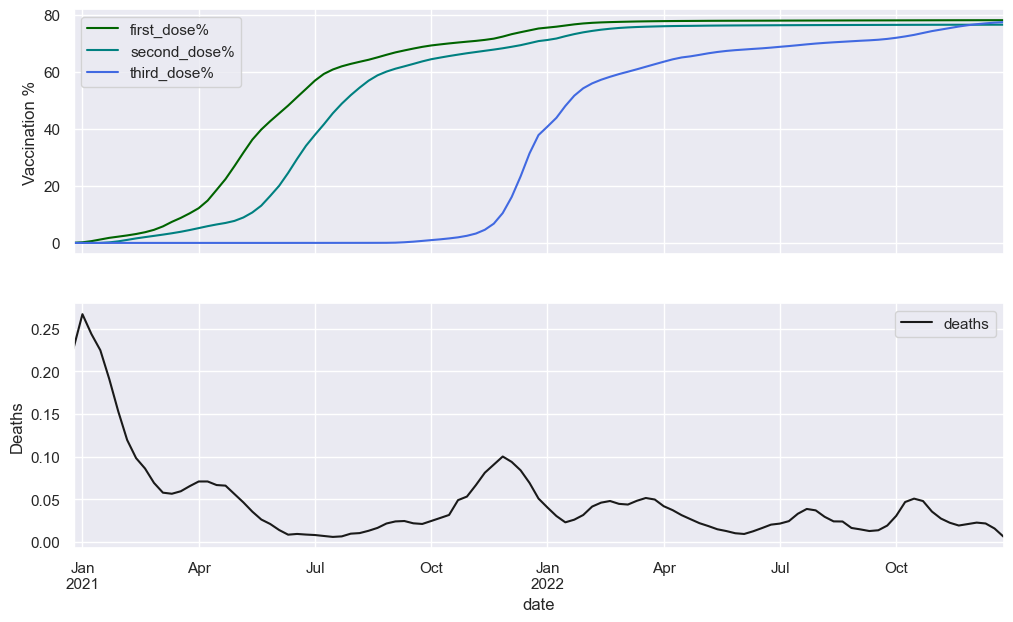

In [179]:
#visualize deaths in parralel with vaccination

fig, axes = plt.subplots(nrows=2,  sharex=True,figsize=(12,7))
vaccination_start_weeks[['first_dose%','second_dose%','third_dose%']].plot(ax=axes[0],legend='first_dose%', color=['darkgreen', 'teal','royalblue'] )
vaccination_start_weeks['deaths'].plot(ax=axes[1],legend='deaths',color='k')
#vaccination_start_weeks['cases'].plot(ax=axes[2],legend='deaths',color='b')

# Set y-label for the first subplot
axes[0].set_ylabel('Vaccination %')

# Set y-label for the second subplot
axes[1].set_ylabel('Deaths')
#axes[2].set_ylabel('Cases')
#ax.set_ylable('Percentage of vaccinated with 1st dose')
plt.show()

#### Does the 3rd dose of vaccination had beneficial effect on death rates or two doses were enough?

In [175]:
#create df from 60% vaccination with second dose 
vaccination_second=covid_vaccines.loc['2021-08-26 00:00:00':]
vaccination_second_weeks=vaccination_second.resample('W').mean() # resize by weeks for better visualization


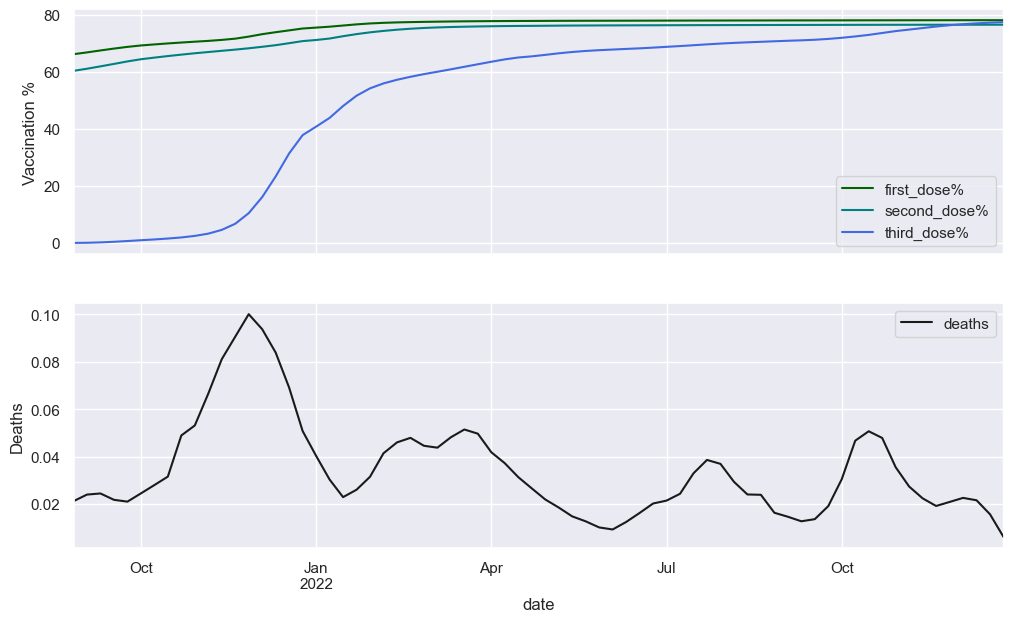

In [180]:
#visualize deaths in parralel with vaccination

fig, axes = plt.subplots(nrows=2,  sharex=True,figsize=(12,7))
vaccination_second_weeks[['first_dose%','second_dose%','third_dose%']].plot(ax=axes[0],legend='first_dose%', color=['darkgreen', 'teal','royalblue'] )
vaccination_second_weeks['deaths'].plot(ax=axes[1],legend='deaths',color='k')
#vaccination_second_weeks['cases'].plot(ax=axes[2],legend='deaths',color='b')

# Set y-label for the first subplot
axes[0].set_ylabel('Vaccination %')

# Set y-label for the second subplot
axes[1].set_ylabel('Deaths')
#axes[2].set_ylabel('Cases')
#ax.set_ylable('Percentage of vaccinated with 1st dose')
plt.show()

In [65]:


#from 60% second dose - 60% vaccinated with 3rd dose
deaths2b = vaccination_second.loc[:'2022-03-03 00:00:00', 'deaths'].sum()
cases2b=vaccination_second.loc[:'2022-03-03 00:00:00', 'cases'].sum()
print ( f'Number of deaths between 60% of second and third dose are {deaths2b} and number of cases are {cases2b}')

death_percent_b2=deaths2b/cases2b *100
print( f'percent of deaths between 60% of second and third dose are{death_percent_b2}')

#after third dose
deaths2a=covid.loc['2022-03-03 00:00:00' :]['deaths'].sum() 
cases2a=covid.loc['2022-03-03 00:00:00' :]['cases'].sum()
print ( f'\n Number of deaths after 60% were vaccinated with third dose is {deaths2a}and number of cases is {cases2a}')

death_percent_a2=deaths2a/cases2a *100
print( f'percent of deaths before 60% were vaccinated with third dose is {death_percent_a2}')

#There is a beneficcial effect of the third vaccine on death rates compared to 2 doses. 
#Atfer 2 doses death rates are 0.99% after 3 doses it decresed to 0.2%

Number of deaths between 60% of second and third dose are 36162 and number of cases are 11680939
percent of deaths between 60% of second and third dose are0.3095812759573524

 Number of deaths after 60% were vaccinated with third dose is 36557and number of cases is 22435231
percent of deaths before 60% were vaccinated with third dose is 0.16294461153531248


### Test alernative explanation - natural immunization  due to recovery.

#### What is the percentage of recovery in population

In [48]:
#Add percentage of population columns ( from total population in Germany)
total_population=demo['population'].sum()
def percent (part_of_population):
    return (part_of_population/total_population)*100
covid['cases%']=covid.apply(lambda x: percent(x['cases']),axis=1)
covid['deaths%']=covid.apply(lambda x: percent(x['deaths']),axis=1)
covid['recovered%']=covid.apply(lambda x: percent(x['recovered']),axis=1)
covid

,state,county,age_group,gender,cases,deaths,recovered,cases%,deaths%,recovered%
date,,,,,,,,,,
2020-03-27,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1,0.000001,0.0,0.000001
2020-03-28,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1,0.000001,0.0,0.000001
2020-04-03,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1,0.000001,0.0,0.000001
2020-10-18,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1,0.000001,0.0,0.000001
2020-10-22,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1,0.000001,0.0,0.000001
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,Thueringen,SK Weimar,NaN,F,1,0,1,0.000001,0.0,0.000001
2022-08-11,Thueringen,SK Weimar,NaN,F,1,0,1,0.000001,0.0,0.000001
2022-09-19,Thueringen,SK Weimar,NaN,F,1,0,1,0.000001,0.0,0.000001


In [55]:
#calculate the recovery percentage
# calculate the percentage of recovered before start of vaccination 
recovered0num=covid.loc[:'2020-12-27 00:00:00' ]['recovered%'].sum()
print( f'percent of recovered before the begining of vaccination {recovered0num}')

# calculate the percentage of recovered then 50% were vaccinated with 1st dose 
recovered1num=covid.loc[:'2021-06-15 00:00:00' ]['recovered%'].sum()
print( f'percent of recovered  then 50% were vaccinated with 1st dose  {recovered1num}')

# calculate the percentage of recovered then 60% were vaccinated with 1st dose 
recovered11num=covid.loc[:'2021-07-12 00:00:00' ]['recovered%'].sum()
print( f'percent of recovered  then 60% were vaccinated with 1st dose  {recovered11num}')

# calculate the percentage of recovered then 60% were vaccinated with 2nd dose 
recovered2num=covid.loc[:'2021-08-26 00:00:00' ]['recovered%'].sum()
print( f'percent of recovered  then 60% were vaccinated with 2nd dose  {recovered2num}')


# calculate the percentage of recovered then 60% were vaccinated with 3rd dose 
recovered2num=covid.loc[:'2022-03-03 00:00:00' ]['recovered%'].sum()
print( f'percent of recovered  then 60% were vaccinated with 3rd dose  {recovered2num}')


percent of recovered before the begining of vaccination 1.943155014008625
percent of recovered  then 50% were vaccinated with 1st dose  4.363523658071776
percent of recovered  then 60% were vaccinated with 1st dose  4.387838511550331
percent of recovered  then 60% were vaccinated with 2nd dose  4.606625215779867
percent of recovered  then 60% were vaccinated with 3rd dose  18.616860412781794


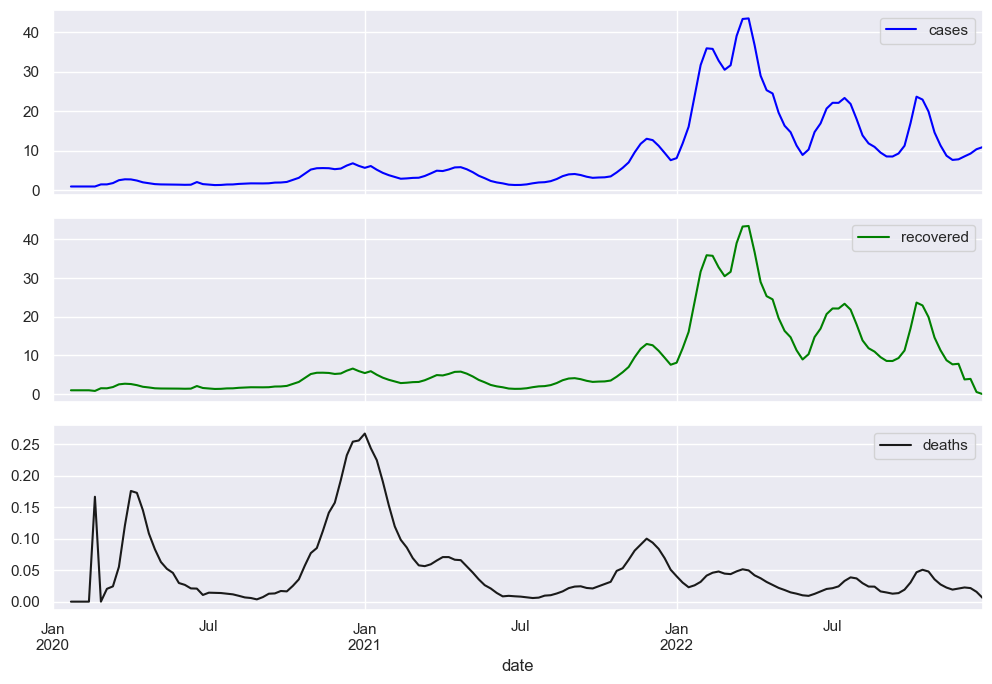

In [97]:
# create subplots to visualise recovery cases and deaths ( same x axis)



fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True,figsize=(10,7))
week_vac_cases['cases'].plot(ax=axes[0],legend='cases', color='blue' )
week_vac_cases['recovered'].plot(ax=axes[1],legend='recoved',color='green' )
week_vac_cases['deaths'].plot(ax=axes[2],legend='death', color='k' )

fig.tight_layout()


The recovery ratios are too low to explain the reduction in death rates

## General conclusions from the project

97.9% of all cases recovered from COVID
Correlation was found between cases and recovery. 
No correlation was found between cases and death.
Correlation was also found between most populated states/counties and number of cases/deaths
Ages 15-59 show more tendency to get infected.
Ages 60+ show higher death rates.
0.43% of all cases died from COVID.
There is a slightly more deaths in males (0.49%) then in females (0.39%)
78% of population got 3 doses of vaccines.
Vaccination decreased death but not infection rates.
The most widespread manufacturer in Germany is Pfizer.
Although, more than 50% of population is in post reproductive age the total death rate is only 0.43%.
Most probably since most of the population got vaccinated and was disciplined.
